In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import cv2
import zipfile
import shutil
import os
import glob
import scipy.stats as stats

#matplot 한글폰트 설정
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\GULIM.TTC").get_name()
plt.rc("font", family = font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]= False


## 6번 농장 이상치 처리

In [30]:
# Aicon academy dir
tom_path = "C:/seokwonna/pythonwork/AI/FinalProject/tomato_farm_hour_data"
tom6 = pd.read_csv(tom_path + "/farm6_hour.csv", index_col=0, encoding='euc-kr')

# ## Home dir
# tom_path = "C:/Users/user/Desktop/Coding/AIproject/seokwonna/Pythonwork/finalproject/tomato_farm_hour_data"
# tom6 = pd.read_csv(tom_path + "/6번농장_hour_df.csv", index_col=0, encoding='utf-8')

In [31]:
tom6.columns

Index(['날짜', 'J/Day', '평균온도', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소',
       '온도토양', '온도급액', '온도배액'],
      dtype='object')

In [32]:
## Home dir route
# tom6 = tom6[['time', ' J/Day ', '평균온도(℃)', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '온도토양', '온도급액',
#        '온도배액' , '내부광량']]
# tom6.head()

In [33]:
## Home dir route
# tom6.drop(columns = ['내부광량'], inplace = True)

In [34]:
## Home dir route
# tom6.columns = ['날짜', 'J/Day', '평균온도', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '온도토양', '온도급액', '온도배액']


In [35]:
tom6_copy = tom6
tom6_copy

,날짜,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
0,2021-10-25 11:00:00,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,10.627604,14.991536,12.888672
1,2021-10-25 12:00:00,1552.0,24.407475,2.805600,3.761688,5.919826,6.748368,343.335484,21.581048,25.834677,24.141532
2,2021-10-25 13:00:00,1552.0,24.842023,2.721864,3.812324,5.923776,6.651351,342.298507,22.169776,25.094216,24.510261
3,2021-10-25 14:00:00,1552.0,24.607697,2.749988,3.906761,5.920353,6.653017,347.647059,22.758929,25.038866,24.942227
4,2021-10-25 15:00:00,1552.0,22.910198,2.713705,3.848237,5.928817,6.644458,361.525000,22.901563,24.300521,24.143229
...,...,...,...,...,...,...,...,...,...,...,...
1365,2021-12-21 08:00:00,1186.0,13.585806,2.446037,3.035981,5.622514,5.860288,900.972973,14.860360,14.969032,16.012387
1366,2021-12-21 09:00:00,1186.0,17.653590,2.474195,3.109794,5.743450,5.867016,813.751938,15.259205,15.635659,17.381783
1367,2021-12-21 10:00:00,1186.0,22.535974,2.639204,3.334455,5.682939,5.962366,592.099237,16.438454,18.394561,19.302958
1368,2021-12-21 11:00:00,1186.0,23.122648,2.731169,3.276885,5.512000,6.034342,470.508333,17.441146,20.093229,19.914583


In [36]:
# ##Home dir data save

# tom6.to_csv('C:/Users/user/Desktop/Coding/AIproject/seokwonna/Pythonwork/finalproject/tomato_farm_hour_data/farm6_hour_final.csv',
#             encoding='euc-kr')

In [37]:
tom6_copy.describe()

,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
count,1160.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,1318.563856,17.483419,2.485320,3.205465,5.933521,6.238342,644.230696,17.195126,17.309818,17.346033
std,335.612472,3.517173,0.169044,0.249110,0.210164,0.279038,171.793641,7.832770,7.767336,7.809785
min,362.000000,12.066213,2.229501,2.861326,5.495000,5.798194,328.966387,-126.250000,-127.267857,-127.375000
25%,1113.500000,14.524529,2.342666,3.017070,5.699700,6.066500,485.392308,16.265752,15.643209,16.078381
50%,1369.000000,16.203120,2.453180,3.127694,5.997099,6.159810,653.805556,17.686170,16.975962,17.103070
75%,1551.325000,20.295256,2.591161,3.352955,6.079696,6.353163,797.267717,19.206771,19.819853,19.829464
max,1884.000000,25.349298,2.968739,3.946891,6.449359,6.982790,949.775000,23.170898,25.834677,25.032227


##### 토마토  column feature 양육 기준 정보
###### - Reference 1: https://samwha27.com/entry/%EC%8A%A4%EB%A7%88%ED%8A%B8%ED%8C%9C-%EA%B8%B0%EC%B4%88%EA%B5%90%EC%9C%A1-%EC%96%91%EC%88%98%EB%B6%84-%EA%B4%80%EB%A6%AC%EB%A5%BC-%EB%B0%B0%EC%9B%8C%EB%B3%B4%EC%9E%90
###### - Reference 2: https://smartfarm.rda.go.kr/dtsv/grwhct_pub.do
- J/Day : 600 ~ 1300
- 평균온도 :  17.4 ~    15 ~ 30도로 유지해야함
- EC 급액 : 2.5 ~ 3.5
- EC 배액 : 3.5 ~ 5.0
- pH 급액 : 5.2 ~ 5.9 or  ## 6.0 ~ 6.5 가 적절하다고 여김 
- pH 배액 : 5.0 ~ 7.0
- 이산화탄소농도 : 400 - 600
- 온도토양 : 15 ~ 25
- 온도급액 : 15 ~ 30
- 온도배액 : 15 ~ 30


In [38]:
##  날짜 index set 

tomato_farm_list = ["tom6_copy"]
for farm in tomato_farm_list:
    farm_data = locals()[farm]
    farm_data.set_index('날짜', inplace=True)  # Set '날짜' column as the index

<AxesSubplot:>

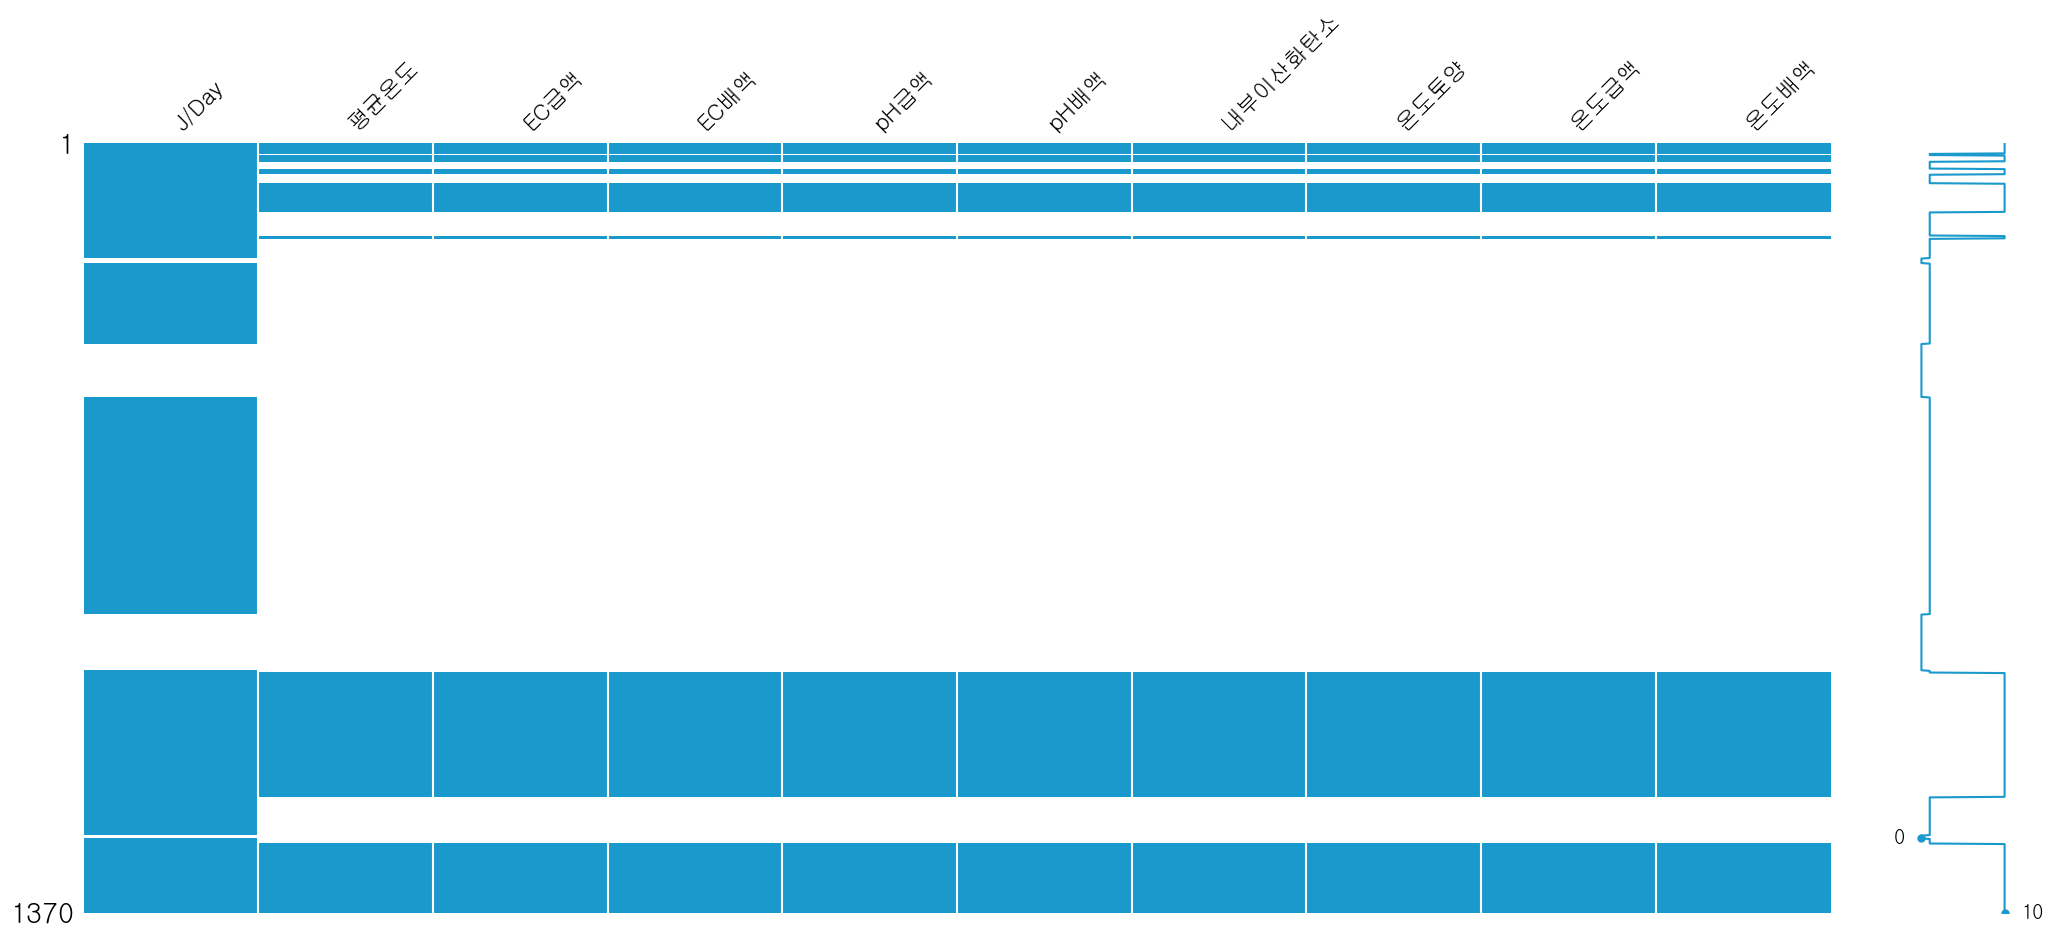

In [39]:
# 결측치 시각화
# cmd에서 pip 설치 하세요 code : pip install missingno
import missingno as msno
msno.matrix(df=tom6_copy.iloc[:, :], color=(0.1, 0.6, 0.8))


<AxesSubplot:>

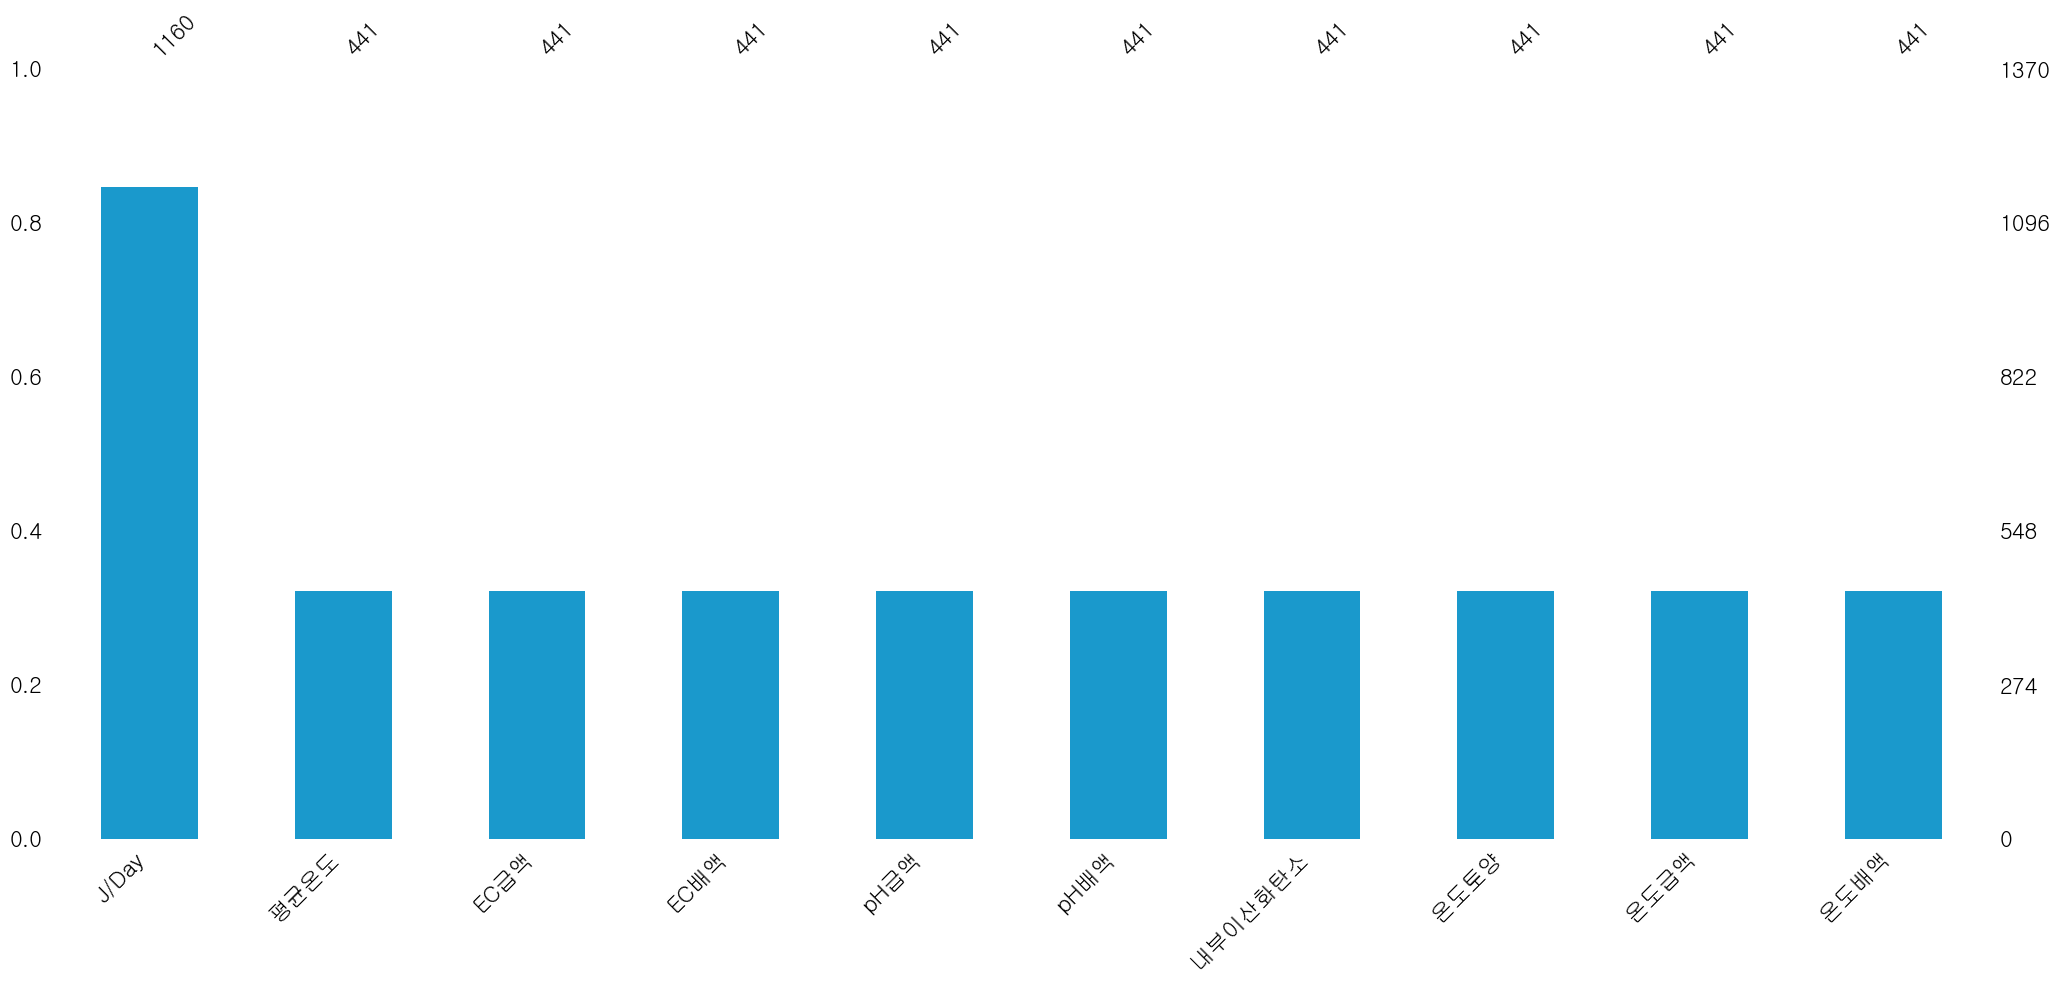

In [40]:
## bar chart
msno.bar(df=tom6_copy.iloc[:, :], color=(0.1, 0.6, 0.8))


<AxesSubplot:>

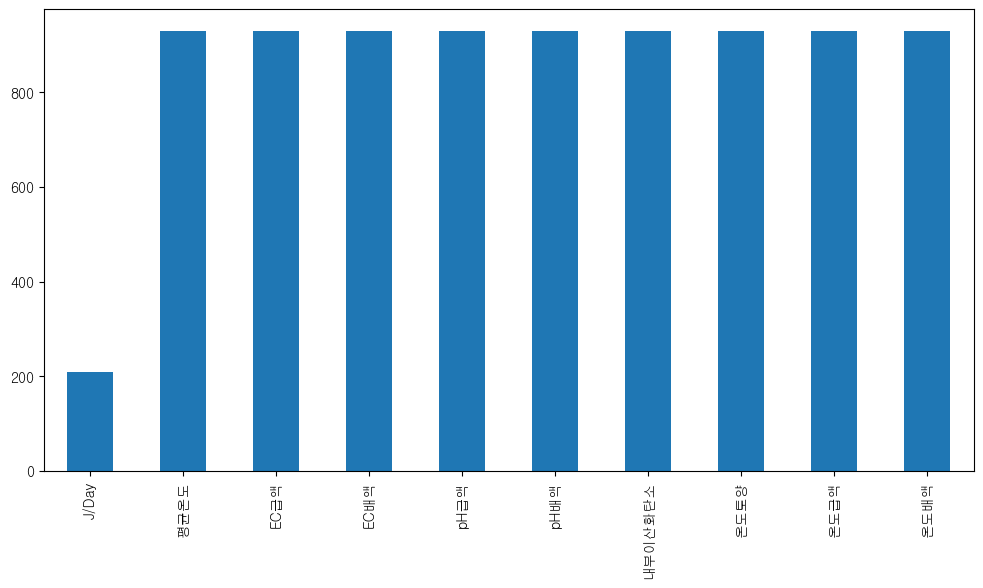

In [41]:
missing = tom6_copy.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))

c:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\acorn\anaconda3\lib\si

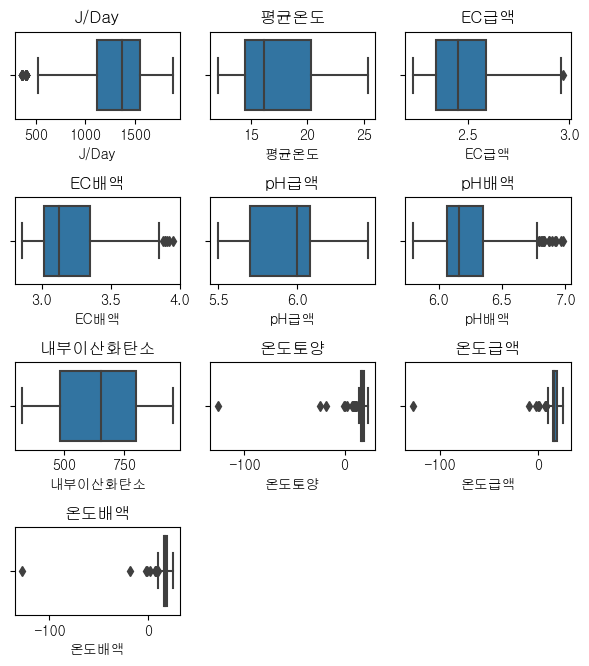

In [42]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom6_copy.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom6_copy[tom6_copy.columns[i]])
    plt.title(tom6_copy.columns[i])
plt.tight_layout()

In [43]:
tom6_copy.describe()

,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
count,1160.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,1318.563856,17.483419,2.485320,3.205465,5.933521,6.238342,644.230696,17.195126,17.309818,17.346033
std,335.612472,3.517173,0.169044,0.249110,0.210164,0.279038,171.793641,7.832770,7.767336,7.809785
min,362.000000,12.066213,2.229501,2.861326,5.495000,5.798194,328.966387,-126.250000,-127.267857,-127.375000
25%,1113.500000,14.524529,2.342666,3.017070,5.699700,6.066500,485.392308,16.265752,15.643209,16.078381
50%,1369.000000,16.203120,2.453180,3.127694,5.997099,6.159810,653.805556,17.686170,16.975962,17.103070
75%,1551.325000,20.295256,2.591161,3.352955,6.079696,6.353163,797.267717,19.206771,19.819853,19.829464
max,1884.000000,25.349298,2.968739,3.946891,6.449359,6.982790,949.775000,23.170898,25.834677,25.032227


In [44]:
# 온도토양 값이 13보다 작은 행들로 이루어진 새로운 데이터프레임 생성
filtered_df = tom6_copy[tom6_copy['온도토양'] <= 13]

# 결과 데이터프레임 출력
filtered_df


,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
날짜,,,,,,,,,,
2021-10-25 11:00:00,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,10.627604,14.991536,12.888672
2021-10-30 07:00:00,1812.0,17.633883,2.313422,3.402695,6.305886,6.692470,762.771812,11.068372,10.581795,10.562081
2021-11-01 10:00:00,1775.0,21.349772,2.541005,3.684936,5.922802,6.929963,413.753086,-17.986883,8.579475,8.952932
2021-12-03 17:00:00,1461.0,15.588385,2.459533,3.177470,5.941429,6.189571,535.285714,-126.250000,-127.267857,-127.375000
2021-12-04 12:00:00,1254.0,22.353631,2.674770,3.293385,5.880593,6.357390,419.296610,10.020657,12.782839,12.613347
2021-12-06 20:00:00,1013.0,15.196411,2.420646,3.010585,5.983365,6.138252,655.886957,9.996196,7.897826,7.816848
2021-12-06 21:00:00,1013.0,14.720511,2.385849,2.976833,5.984008,6.138874,685.378151,9.804097,7.630777,7.566176
2021-12-07 08:00:00,1214.0,15.560354,2.340345,3.001431,6.047524,6.162087,895.587302,-0.339782,8.103175,8.119544
2021-12-07 16:00:00,1214.0,19.504017,2.663102,3.309056,5.939490,6.129817,489.000000,0.926082,1.710938,1.671875


In [45]:
print("온도토양 < 13 인 값의 개수 : ", len(filtered_df))

온도토양 < 13 인 값의 개수 :  19


In [47]:
# 조건을 만족하는 행들 중에서 '평균온도' 값과 같은 값으로 '온도토양' 열을 채우기
tom6_copy.loc[tom6_copy['온도토양'] <= 13, '온도토양'] = tom6_copy.loc[tom6_copy['온도토양'] <= 13, '평균온도']

# 결과 데이터프레임 출력
tom6_copy

,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
날짜,,,,,,,,,,
2021-10-25 11:00:00,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,25.113070,14.991536,12.888672
2021-10-25 12:00:00,1552.0,24.407475,2.805600,3.761688,5.919826,6.748368,343.335484,21.581048,25.834677,24.141532
2021-10-25 13:00:00,1552.0,24.842023,2.721864,3.812324,5.923776,6.651351,342.298507,22.169776,25.094216,24.510261
2021-10-25 14:00:00,1552.0,24.607697,2.749988,3.906761,5.920353,6.653017,347.647059,22.758929,25.038866,24.942227
2021-10-25 15:00:00,1552.0,22.910198,2.713705,3.848237,5.928817,6.644458,361.525000,22.901563,24.300521,24.143229
...,...,...,...,...,...,...,...,...,...,...
2021-12-21 08:00:00,1186.0,13.585806,2.446037,3.035981,5.622514,5.860288,900.972973,14.860360,14.969032,16.012387
2021-12-21 09:00:00,1186.0,17.653590,2.474195,3.109794,5.743450,5.867016,813.751938,15.259205,15.635659,17.381783
2021-12-21 10:00:00,1186.0,22.535974,2.639204,3.334455,5.682939,5.962366,592.099237,16.438454,18.394561,19.302958


In [48]:
tom6_copy.describe()

,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
count,1160.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,1318.563856,17.483419,2.485320,3.205465,5.933521,6.238342,644.230696,18.098812,17.309818,17.346033
std,335.612472,3.517173,0.169044,0.249110,0.210164,0.279038,171.793641,2.061946,7.767336,7.809785
min,362.000000,12.066213,2.229501,2.861326,5.495000,5.798194,328.966387,14.133433,-127.267857,-127.375000
25%,1113.500000,14.524529,2.342666,3.017070,5.699700,6.066500,485.392308,16.403689,15.643209,16.078381
50%,1369.000000,16.203120,2.453180,3.127694,5.997099,6.159810,653.805556,17.867188,16.975962,17.103070
75%,1551.325000,20.295256,2.591161,3.352955,6.079696,6.353163,797.267717,19.346635,19.819853,19.829464
max,1884.000000,25.349298,2.968739,3.946891,6.449359,6.982790,949.775000,25.113070,25.834677,25.032227


In [49]:
# 온도급액, 온도배액의 값이 15보다 작은 행들로 이루어진 새로운 데이터프레임 생성
filtered_df = tom6_copy[(tom6_copy['온도급액'] < 15) & (tom6_copy['온도배액'] < 15)]
filtered_df


,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
날짜,,,,,,,,,,
2021-10-25 11:00:00,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,25.113070,14.991536,12.888672
2021-10-30 07:00:00,1812.0,17.633883,2.313422,3.402695,6.305886,6.692470,762.771812,17.633883,10.581795,10.562081
2021-11-01 10:00:00,1775.0,21.349772,2.541005,3.684936,5.922802,6.929963,413.753086,21.349772,8.579475,8.952932
2021-12-03 17:00:00,1461.0,15.588385,2.459533,3.177470,5.941429,6.189571,535.285714,15.588385,-127.267857,-127.375000
2021-12-04 12:00:00,1254.0,22.353631,2.674770,3.293385,5.880593,6.357390,419.296610,22.353631,12.782839,12.613347
2021-12-06 20:00:00,1013.0,15.196411,2.420646,3.010585,5.983365,6.138252,655.886957,15.196411,7.897826,7.816848
2021-12-06 21:00:00,1013.0,14.720511,2.385849,2.976833,5.984008,6.138874,685.378151,14.720511,7.630777,7.566176
2021-12-07 08:00:00,1214.0,15.560354,2.340345,3.001431,6.047524,6.162087,895.587302,15.560354,8.103175,8.119544
2021-12-07 16:00:00,1214.0,19.504017,2.663102,3.309056,5.939490,6.129817,489.000000,19.504017,1.710938,1.671875


In [50]:
print("온도급액, 온도배액 < 15 인 값의 개수 : ", len(tom6_copy))

온도급액, 온도배액 < 15 인 값의 개수 :  1370


In [51]:
print("6번농장 결측치 개수 : ","\n", tom6_copy.isna().sum())

6번농장 결측치 개수 :  
 J/Day      210
평균온도       929
EC급액       929
EC배액       929
pH급액       929
pH배액       929
내부이산화탄소    929
온도토양       929
온도급액       929
온도배액       929
dtype: int64


In [52]:
# 조건을 만족하는 행들 중에서 '온도급액', '온도배액' 값을 NaN으로 변경
tom6_copy.loc[(tom6_copy['온도급액'] < 15) & (tom6_copy['온도배액'] < 15), ['온도급액', '온도배액']] = np.nan

# 결과 데이터프레임 출력
tom6_copy


,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
날짜,,,,,,,,,,
2021-10-25 11:00:00,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,25.113070,NaN,NaN
2021-10-25 12:00:00,1552.0,24.407475,2.805600,3.761688,5.919826,6.748368,343.335484,21.581048,25.834677,24.141532
2021-10-25 13:00:00,1552.0,24.842023,2.721864,3.812324,5.923776,6.651351,342.298507,22.169776,25.094216,24.510261
2021-10-25 14:00:00,1552.0,24.607697,2.749988,3.906761,5.920353,6.653017,347.647059,22.758929,25.038866,24.942227
2021-10-25 15:00:00,1552.0,22.910198,2.713705,3.848237,5.928817,6.644458,361.525000,22.901563,24.300521,24.143229
...,...,...,...,...,...,...,...,...,...,...
2021-12-21 08:00:00,1186.0,13.585806,2.446037,3.035981,5.622514,5.860288,900.972973,14.860360,14.969032,16.012387
2021-12-21 09:00:00,1186.0,17.653590,2.474195,3.109794,5.743450,5.867016,813.751938,15.259205,15.635659,17.381783
2021-12-21 10:00:00,1186.0,22.535974,2.639204,3.334455,5.682939,5.962366,592.099237,16.438454,18.394561,19.302958


In [53]:
print(tom6_copy.isna().sum())

J/Day      210
평균온도       929
EC급액       929
EC배액       929
pH급액       929
pH배액       929
내부이산화탄소    929
온도토양       929
온도급액       947
온도배액       947
dtype: int64


In [54]:
tom6_copy.describe()

,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
count,1160.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,423.000000,423.000000
mean,1318.563856,17.483419,2.485320,3.205465,5.933521,6.238342,644.230696,18.098812,18.040654,18.115091
std,335.612472,3.517173,0.169044,0.249110,0.210164,0.279038,171.793641,2.061946,2.746872,2.535375
min,362.000000,12.066213,2.229501,2.861326,5.495000,5.798194,328.966387,14.133433,14.324219,7.912598
25%,1113.500000,14.524529,2.342666,3.017070,5.699700,6.066500,485.392308,16.403689,15.748228,16.151195
50%,1369.000000,16.203120,2.453180,3.127694,5.997099,6.159810,653.805556,17.867188,17.125000,17.285417
75%,1551.325000,20.295256,2.591161,3.352955,6.079696,6.353163,797.267717,19.346635,20.097772,19.923594
max,1884.000000,25.349298,2.968739,3.946891,6.449359,6.982790,949.775000,25.113070,25.834677,25.032227


In [55]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

tomato_farm_list = ["tom6_copy"]

iterative_imputed_data_list = []

for farm in tomato_farm_list:
    farm_data = locals()[farm]
    print("============================================================================")
    print(farm, "농장 데이터 정보:")
    print(farm_data.info())
    print("============================================================================")
    imputer = IterativeImputer(random_state=0)
    imputed_data = imputer.fit_transform(farm_data)
    imputed_df = pd.DataFrame(imputed_data, columns=farm_data.columns)
    iterative_imputed_data_list.append(imputed_df)
    locals()[farm + "_imputed"] = imputed_df

# 각 농장별 보간된 데이터프레임 출력
for i, farm in enumerate(tomato_farm_list):
    imputed_df = iterative_imputed_data_list[i]
    print("============================================================================")
    print(farm, "농장 보간된 데이터:")
    print(imputed_df)
    print("============================================================================")


tom6_copy 농장 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 2021-10-25 11:00:00 to 2021-12-21 12:00:00
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   J/Day    1160 non-null   float64
 1   평균온도     441 non-null    float64
 2   EC급액     441 non-null    float64
 3   EC배액     441 non-null    float64
 4   pH급액     441 non-null    float64
 5   pH배액     441 non-null    float64
 6   내부이산화탄소  441 non-null    float64
 7   온도토양     441 non-null    float64
 8   온도급액     423 non-null    float64
 9   온도배액     423 non-null    float64
dtypes: float64(10)
memory usage: 117.7+ KB
None
tom6_copy 농장 보간된 데이터:
       J/Day       평균온도      EC급액      EC배액      pH급액      pH배액     내부이산화탄소  \
0     1552.0  25.113070  2.830347  3.722351  5.947333  6.743198  346.968750   
1     1552.0  24.407475  2.805600  3.761688  5.919826  6.748368  343.335484   
2     1552.0  24.842023  2.721864  3.812324  5.923776  6.651351  342.298507   
3

c:\Users\acorn\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [56]:
imputed_dataframe_count = len(iterative_imputed_data_list)
imputed_dataframe_names = [farm + "_iterative_imputed" for farm in tomato_farm_list]
print("보간된 데이터프레임 개수:", imputed_dataframe_count)
print("보간된 데이터프레임 변수명:", imputed_dataframe_names)

tom6_iterative_imputed = iterative_imputed_data_list[0]

보간된 데이터프레임 개수: 1
보간된 데이터프레임 변수명: ['tom6_copy_iterative_imputed']


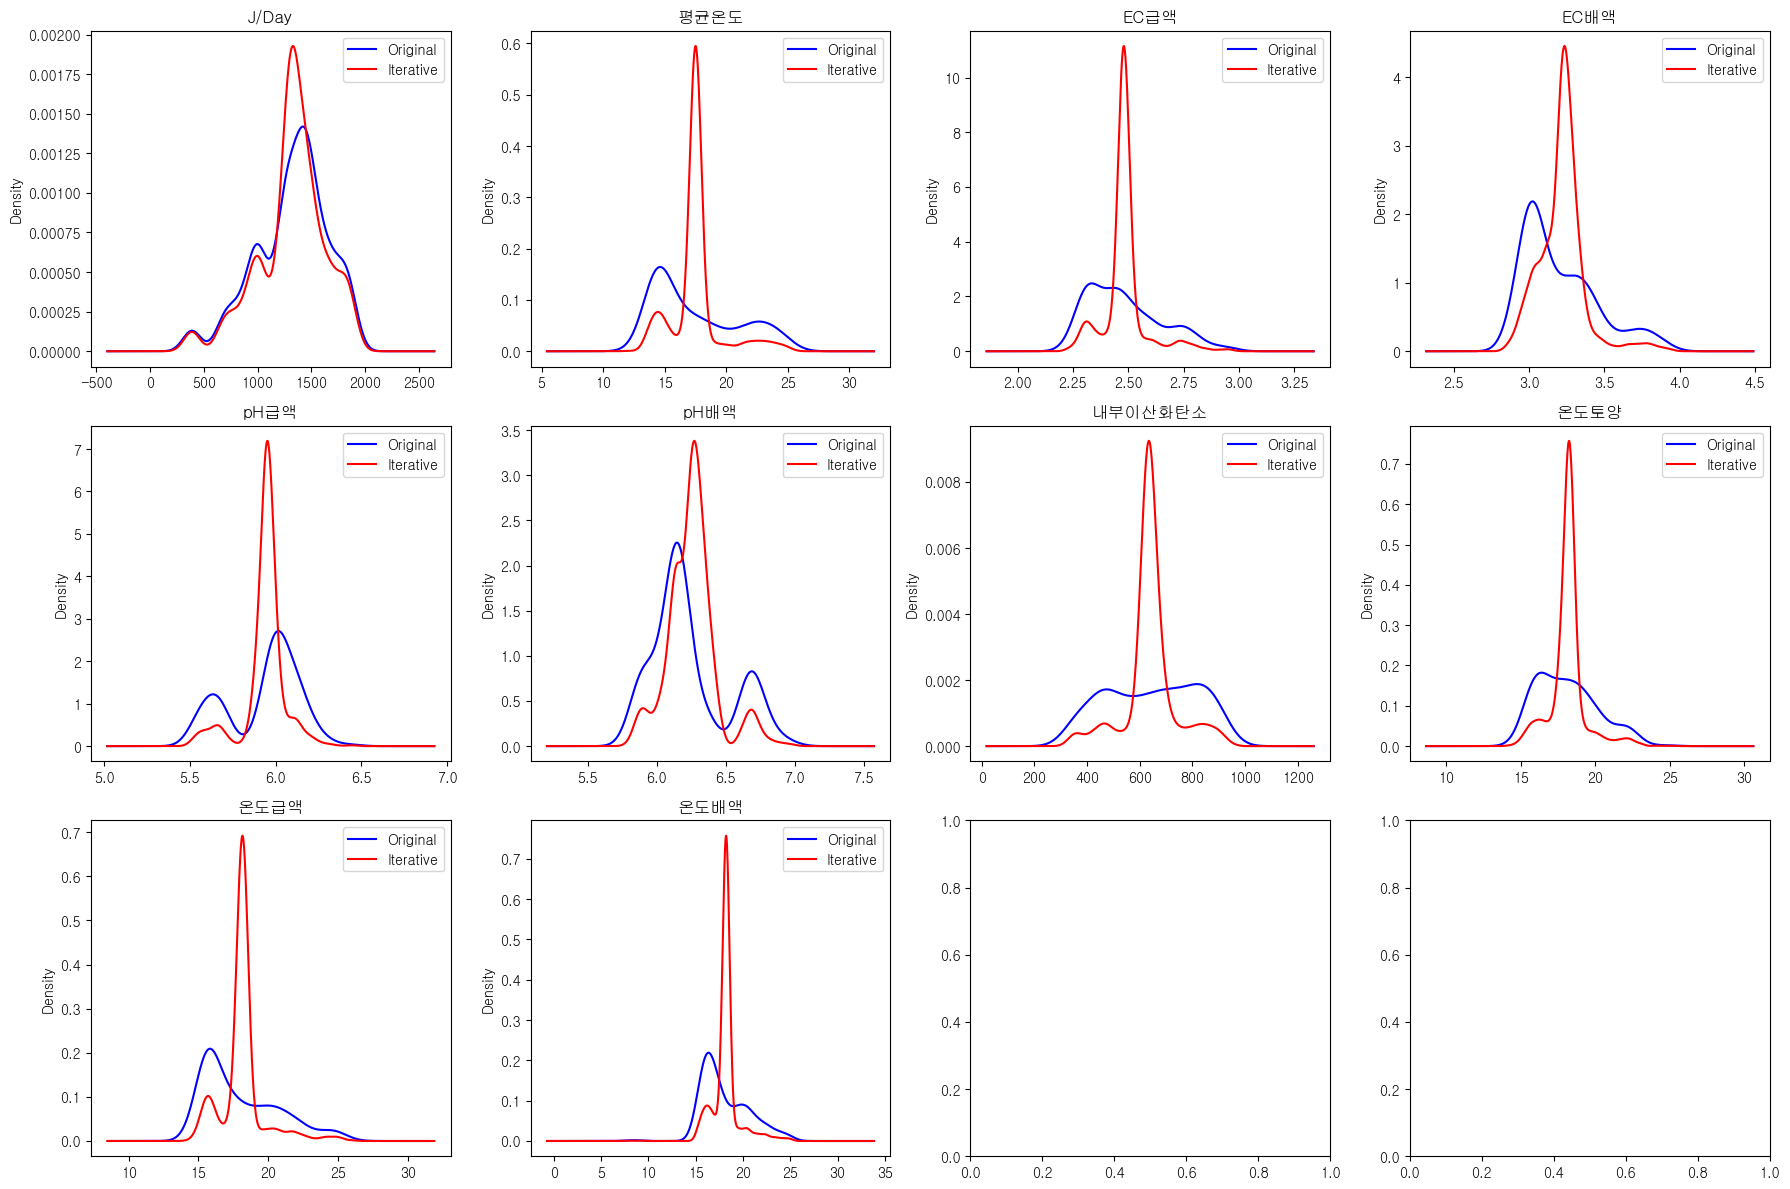

In [57]:
## 분석 시각화하기
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, (column1, column2) in enumerate(zip(tom6_copy.columns, tom6_iterative_imputed.columns)):
    ax = axes[i // 4, i % 4]
    tom6_copy[column1].plot(kind='kde', ax=ax, color='blue', label='Original')
    tom6_iterative_imputed[column2].plot(
        kind='kde', ax=ax, color='red', label='Iterative')
    ax.set_title(column1)
    ax.legend()

plt.tight_layout()
plt.show()


In [58]:
## simpleimputer
# 결측치 처리 - mean
from sklearn.impute import SimpleImputer
SI_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
SI_mean.fit(tom6_copy)
tom6_mean = SI_mean.transform(tom6_copy)
tom6_mean = pd.DataFrame(tom6_mean, columns=tom6_copy.columns)
tom6_mean


,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
0,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,25.113070,18.040654,18.115091
1,1552.0,24.407475,2.805600,3.761688,5.919826,6.748368,343.335484,21.581048,25.834677,24.141532
2,1552.0,24.842023,2.721864,3.812324,5.923776,6.651351,342.298507,22.169776,25.094216,24.510261
3,1552.0,24.607697,2.749988,3.906761,5.920353,6.653017,347.647059,22.758929,25.038866,24.942227
4,1552.0,22.910198,2.713705,3.848237,5.928817,6.644458,361.525000,22.901563,24.300521,24.143229
...,...,...,...,...,...,...,...,...,...,...
1365,1186.0,13.585806,2.446037,3.035981,5.622514,5.860288,900.972973,14.860360,14.969032,16.012387
1366,1186.0,17.653590,2.474195,3.109794,5.743450,5.867016,813.751938,15.259205,15.635659,17.381783
1367,1186.0,22.535974,2.639204,3.334455,5.682939,5.962366,592.099237,16.438454,18.394561,19.302958
1368,1186.0,23.122648,2.731169,3.276885,5.512000,6.034342,470.508333,17.441146,20.093229,19.914583


In [59]:
# 결측치 처리 - median
from sklearn.impute import SimpleImputer
SI_median = SimpleImputer(missing_values=np.nan, strategy='median')
SI_median.fit(tom6_copy)
tom6_median = SI_median.transform(tom6_copy)
tom6_median = pd.DataFrame(tom6_median, columns=tom6_copy.columns)
tom6_median


,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
0,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,25.113070,17.125000,17.285417
1,1552.0,24.407475,2.805600,3.761688,5.919826,6.748368,343.335484,21.581048,25.834677,24.141532
2,1552.0,24.842023,2.721864,3.812324,5.923776,6.651351,342.298507,22.169776,25.094216,24.510261
3,1552.0,24.607697,2.749988,3.906761,5.920353,6.653017,347.647059,22.758929,25.038866,24.942227
4,1552.0,22.910198,2.713705,3.848237,5.928817,6.644458,361.525000,22.901563,24.300521,24.143229
...,...,...,...,...,...,...,...,...,...,...
1365,1186.0,13.585806,2.446037,3.035981,5.622514,5.860288,900.972973,14.860360,14.969032,16.012387
1366,1186.0,17.653590,2.474195,3.109794,5.743450,5.867016,813.751938,15.259205,15.635659,17.381783
1367,1186.0,22.535974,2.639204,3.334455,5.682939,5.962366,592.099237,16.438454,18.394561,19.302958
1368,1186.0,23.122648,2.731169,3.276885,5.512000,6.034342,470.508333,17.441146,20.093229,19.914583


In [60]:
# 결측치 처리 - most_frequent
from sklearn.impute import SimpleImputer
SI_most_frequent = SimpleImputer(
    missing_values=np.nan, strategy='most_frequent')
SI_most_frequent.fit(tom6_copy)
tom6_most_frequent = SI_most_frequent.transform(tom6_copy)
tom6_most_frequent = pd.DataFrame(
    tom6_most_frequent, columns=tom6_copy.columns)
tom6_most_frequent


c:\Users\acorn\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
0,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,25.113070,19.019413,16.327877
1,1552.0,24.407475,2.805600,3.761688,5.919826,6.748368,343.335484,21.581048,25.834677,24.141532
2,1552.0,24.842023,2.721864,3.812324,5.923776,6.651351,342.298507,22.169776,25.094216,24.510261
3,1552.0,24.607697,2.749988,3.906761,5.920353,6.653017,347.647059,22.758929,25.038866,24.942227
4,1552.0,22.910198,2.713705,3.848237,5.928817,6.644458,361.525000,22.901563,24.300521,24.143229
...,...,...,...,...,...,...,...,...,...,...
1365,1186.0,13.585806,2.446037,3.035981,5.622514,5.860288,900.972973,14.860360,14.969032,16.012387
1366,1186.0,17.653590,2.474195,3.109794,5.743450,5.867016,813.751938,15.259205,15.635659,17.381783
1367,1186.0,22.535974,2.639204,3.334455,5.682939,5.962366,592.099237,16.438454,18.394561,19.302958
1368,1186.0,23.122648,2.731169,3.276885,5.512000,6.034342,470.508333,17.441146,20.093229,19.914583


## 3)결측치 처리: KNNImputer

In [61]:
from sklearn.impute import KNNImputer
imputer3 = KNNImputer(n_neighbors=3)
mm_knn3_tom6 = imputer3.fit_transform(tom6_copy)
mm_knn3_tom6 = pd.DataFrame(
    mm_knn3_tom6, columns=tom6_copy.columns)

imputer4 = KNNImputer(n_neighbors=4)
mm_knn4_tom6 = imputer4.fit_transform(tom6_copy)
mm_knn4_tom6 = pd.DataFrame(
    mm_knn4_tom6, columns=tom6_copy.columns)

imputer5 = KNNImputer(n_neighbors=5)
mm_knn5_tom6 = imputer5.fit_transform(tom6_copy)
mm_knn5_tom6 = pd.DataFrame(
    mm_knn5_tom6, columns=tom6_copy.columns)

imputer6 = KNNImputer(n_neighbors=6)
mm_knn6_tom6 = imputer6.fit_transform(tom6_copy)
mm_knn6_tom6 = pd.DataFrame(
    mm_knn6_tom6, columns=tom6_copy.columns)

imputer7 = KNNImputer(n_neighbors=7)
mm_knn7_tom6 = imputer7.fit_transform(tom6_copy)
mm_knn7_tom6 = pd.DataFrame(
    mm_knn7_tom6, columns=tom6_copy.columns)


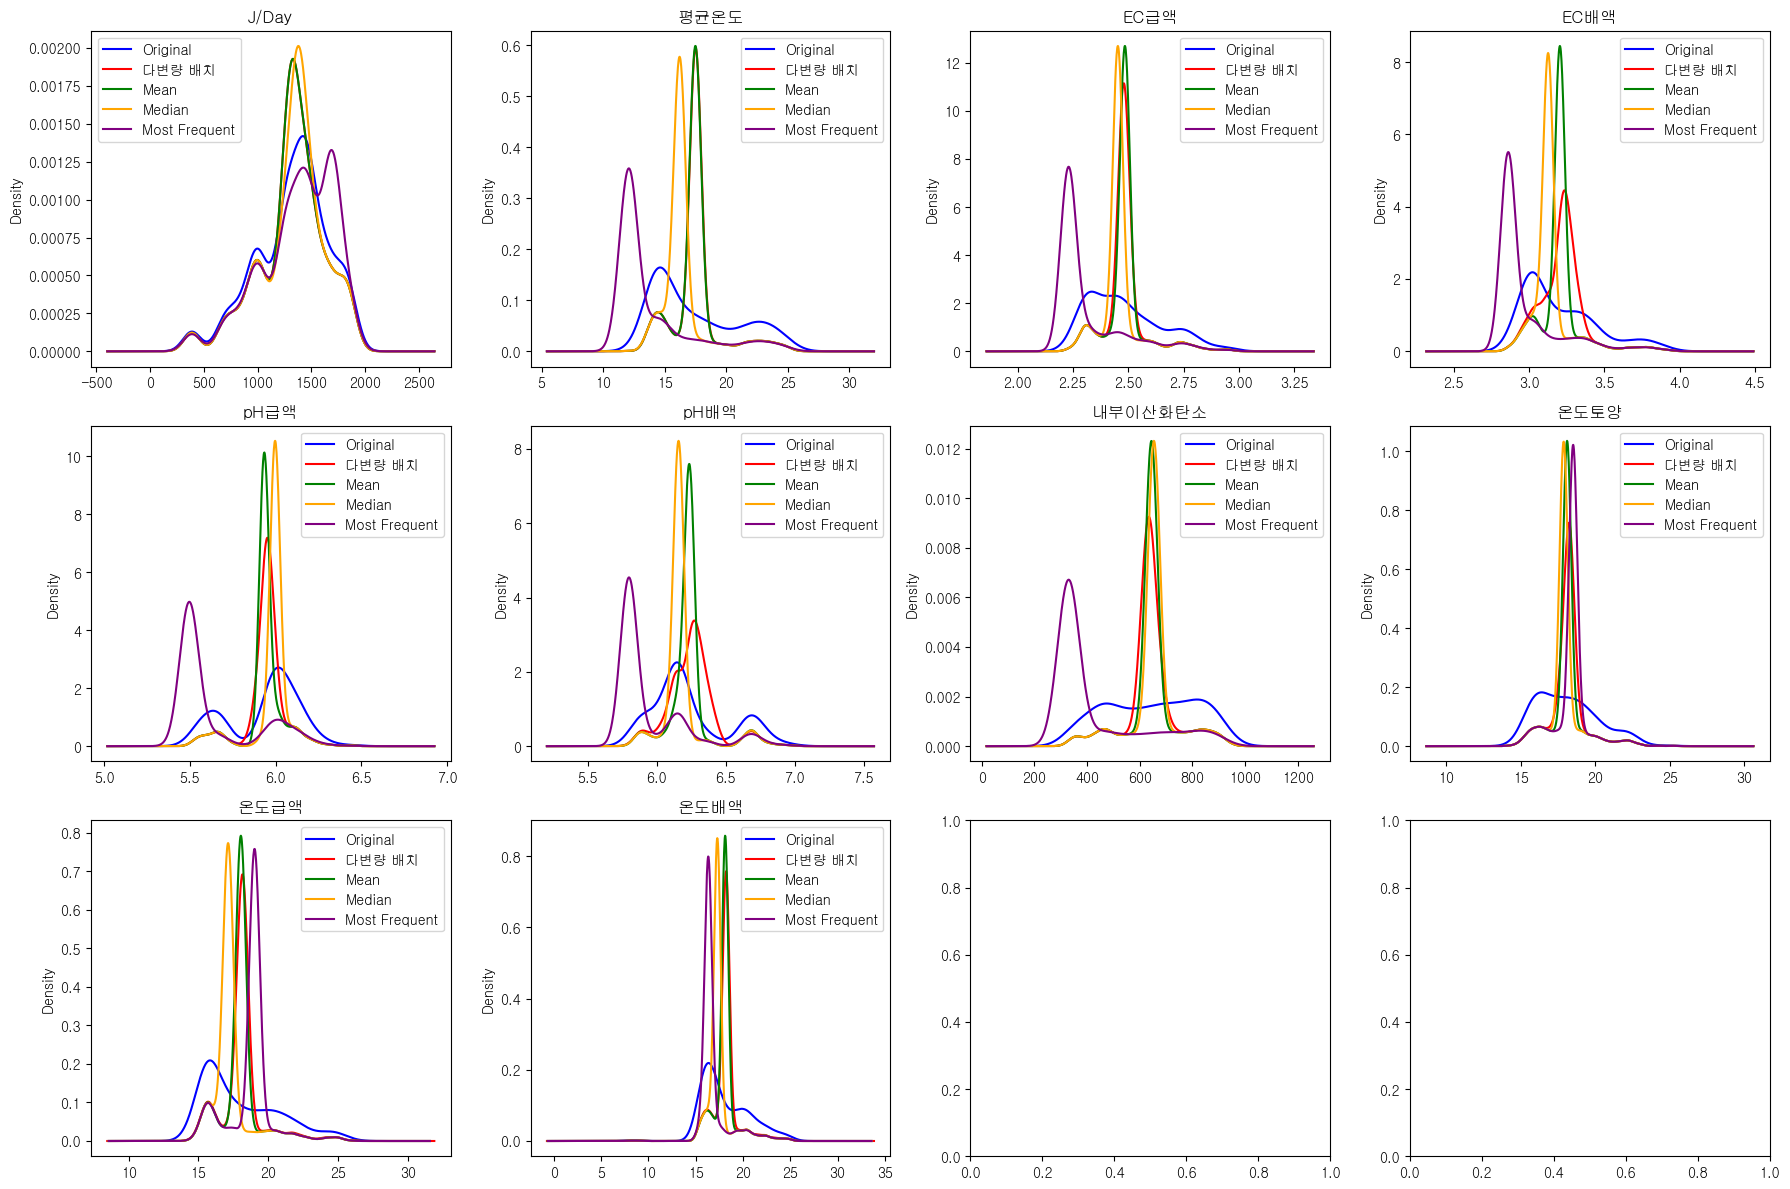

In [62]:
### 시각화 정리 -1 결측치 다변량, mean, median, most_frequent 결측치 처리
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, (column1, column2, column3, column4, column5) in enumerate(zip(tom6_copy.columns, tom6_iterative_imputed.columns,
                                                                      tom6_mean.columns, tom6_median.columns,
                                                                      tom6_most_frequent.columns)):
    ax = axes[i // 4, i % 4]
    tom6_copy[column1].plot(kind='kde', ax=ax, color='blue', label='Original')
    tom6_iterative_imputed[column2].plot(kind='kde', ax=ax, color='red',
                         label='다변량 배치')
    tom6_mean[column3].plot(
        kind='kde', ax=ax, color='green', label='Mean')
    tom6_median[column4].plot(
        kind='kde', ax=ax, color='orange', label='Median')
    tom6_most_frequent[column5].plot(
        kind='kde', ax=ax, color='purple', label='Most Frequent')
    ax.set_title(column1)
    ax.legend()

plt.tight_layout()
plt.show()


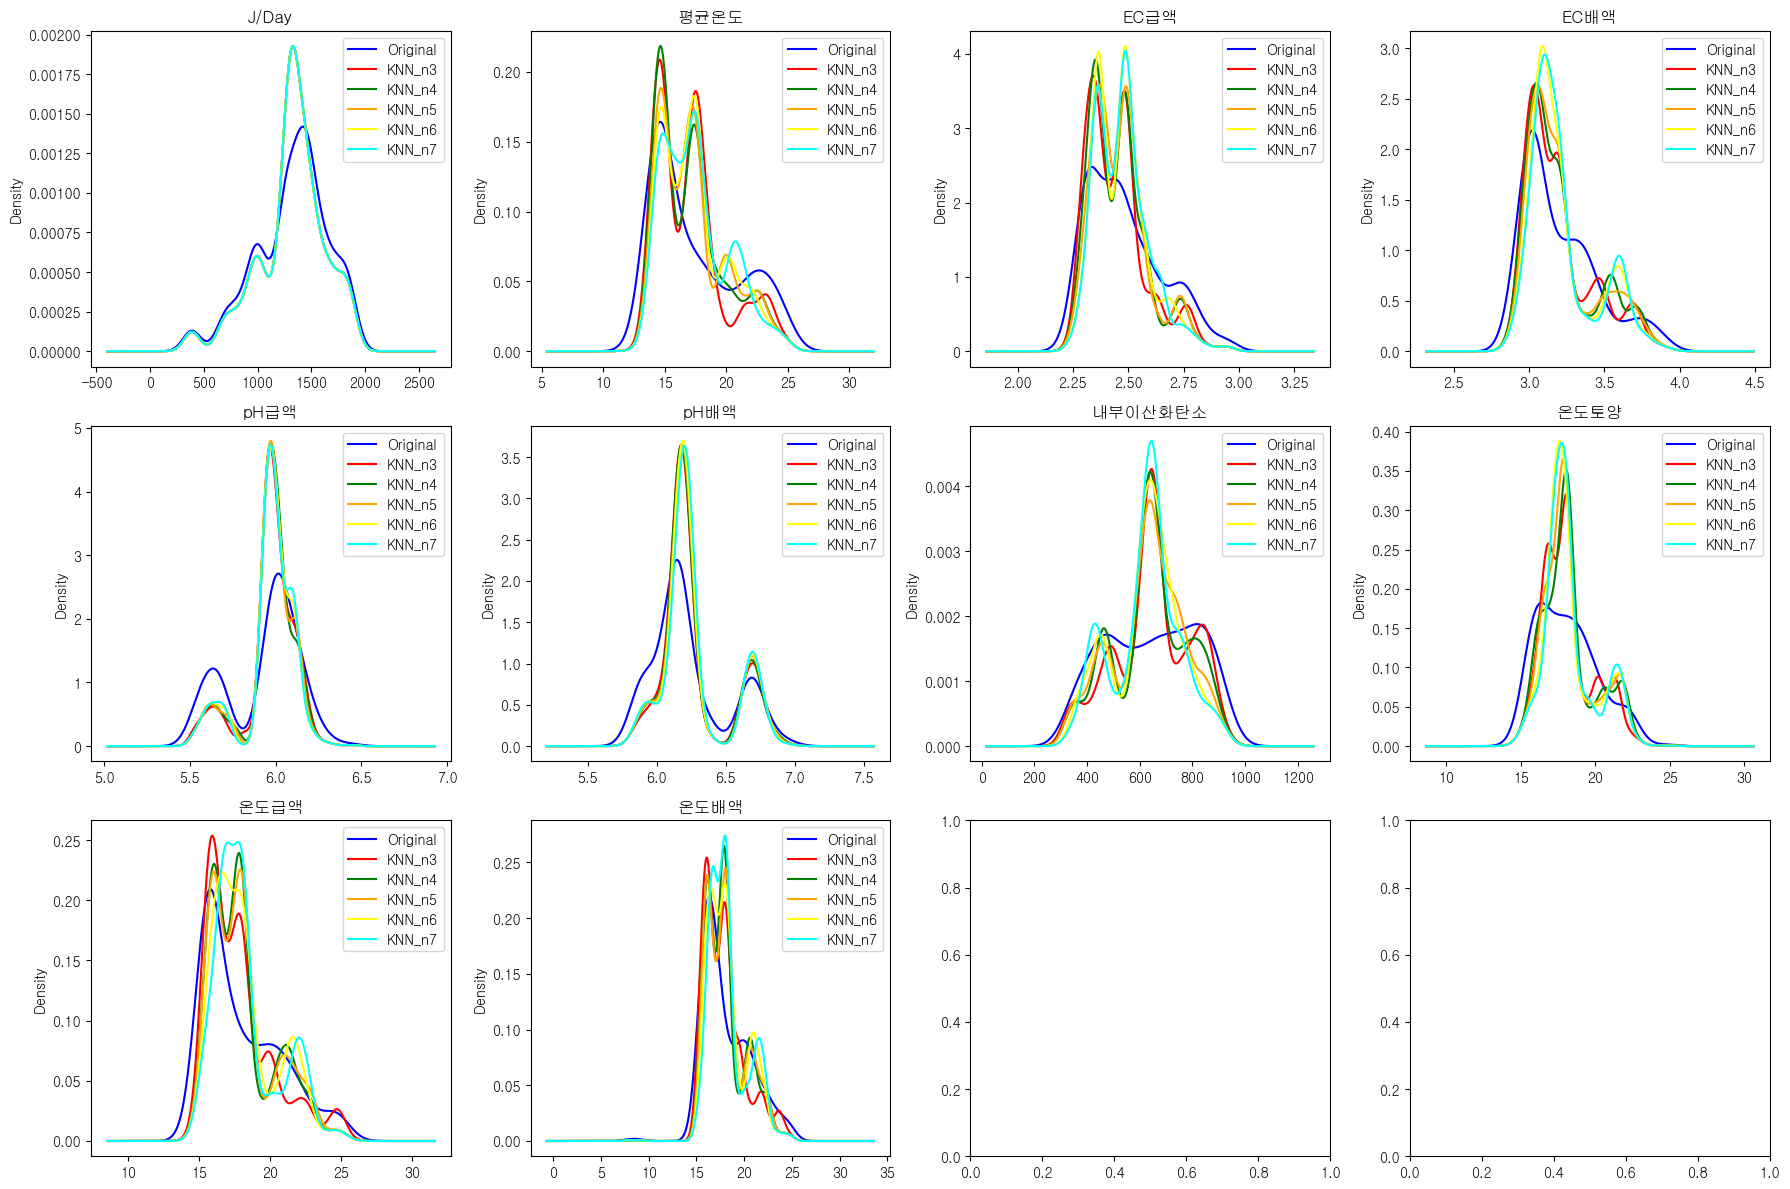

In [63]:
### 시각화 정리 -2 KNN, n_neighbor = 3, 4, 5, 6, 7
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, (column1, column2, column3, column4, column5, column6) in enumerate(zip(tom6_copy.columns, mm_knn3_tom6.columns,
                                                             mm_knn4_tom6.columns, mm_knn5_tom6.columns,
                                                             mm_knn6_tom6.columns, mm_knn7_tom6.columns)):
    ax = axes[i // 4, i % 4]
    tom6_copy[column1].plot(kind='kde', ax=ax, color='blue', label='Original')
    mm_knn3_tom6[column2].plot(kind='kde', ax=ax, color='red',
                             label='KNN_n3')
    mm_knn4_tom6[column3].plot(
        kind='kde', ax=ax, color='green', label='KNN_n4')
    mm_knn5_tom6[column4].plot(
        kind='kde', ax=ax, color='orange', label='KNN_n5')
    mm_knn6_tom6[column5].plot(
        kind='kde', ax=ax, color='yellow', label='KNN_n6')
    mm_knn7_tom6[column6].plot(
        kind='kde', ax=ax, color='aqua', label='KNN_n7')
    ax.set_title(column1)
    ax.legend()

plt.tight_layout()
plt.show()


In [64]:
"""
KNN_n 결측치 처리 모델 중, KNN_n_6, KNN_n_7 결측치 처리 모델이 적합하다고 판단되어 KNN_6 모델을 KNN_n 결측치 처리 모델로 사용하여 결측치 처리 모델 시각화에 다른 모델들과 비교
"""

'\nKNN_n 결측치 처리 모델 중, KNN_n_6, KNN_n_7 결측치 처리 모델이 적합하다고 판단되어 KNN_6 모델을 KNN_n 결측치 처리 모델로 사용하여 결측치 처리 모델 시각화에 다른 모델들과 비교\n'

In [65]:
###cmd에서 pip 설치 하세요 code : pip install impyute
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [66]:
tom6_copy

,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
날짜,,,,,,,,,,
2021-10-25 11:00:00,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,25.113070,NaN,NaN
2021-10-25 12:00:00,1552.0,24.407475,2.805600,3.761688,5.919826,6.748368,343.335484,21.581048,25.834677,24.141532
2021-10-25 13:00:00,1552.0,24.842023,2.721864,3.812324,5.923776,6.651351,342.298507,22.169776,25.094216,24.510261
2021-10-25 14:00:00,1552.0,24.607697,2.749988,3.906761,5.920353,6.653017,347.647059,22.758929,25.038866,24.942227
2021-10-25 15:00:00,1552.0,22.910198,2.713705,3.848237,5.928817,6.644458,361.525000,22.901563,24.300521,24.143229
...,...,...,...,...,...,...,...,...,...,...
2021-12-21 08:00:00,1186.0,13.585806,2.446037,3.035981,5.622514,5.860288,900.972973,14.860360,14.969032,16.012387
2021-12-21 09:00:00,1186.0,17.653590,2.474195,3.109794,5.743450,5.867016,813.751938,15.259205,15.635659,17.381783
2021-12-21 10:00:00,1186.0,22.535974,2.639204,3.334455,5.682939,5.962366,592.099237,16.438454,18.394561,19.302958


In [67]:
## MICE(Multivariate Imputation by Chained Equation) package
np_imputed=mice(tom6_copy.values) # mice 학습시작
tom6_MICE = pd.DataFrame(np_imputed, columns = tom6_copy.columns)

# 변환 후 데이터 확인
tom6_MICE.head(10)

,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
0,1552.0,25.113070,2.830347,3.722351,5.947333,6.743198,346.968750,25.113070,25.811617,25.118821
1,1552.0,24.407475,2.805600,3.761688,5.919826,6.748368,343.335484,21.581048,25.834677,24.141532
2,1552.0,24.842023,2.721864,3.812324,5.923776,6.651351,342.298507,22.169776,25.094216,24.510261
3,1552.0,24.607697,2.749988,3.906761,5.920353,6.653017,347.647059,22.758929,25.038866,24.942227
4,1552.0,22.910198,2.713705,3.848237,5.928817,6.644458,361.525000,22.901563,24.300521,24.143229
5,1552.0,21.478510,2.649883,3.762560,5.950950,6.641538,386.637500,22.867969,23.354688,23.119531
6,1552.0,19.911220,2.554271,3.647171,6.032366,6.637341,442.878049,22.565549,21.849085,21.621951
7,1552.0,18.659878,2.471718,3.550241,6.025667,6.630930,458.122807,22.117325,20.600877,20.282895
8,1552.0,18.102116,2.422402,3.489029,6.013469,6.623453,469.203125,21.597656,19.602539,19.344727
9,1552.0,17.501741,2.382661,3.438094,6.041437,6.617646,495.229167,21.054688,18.899740,18.582031


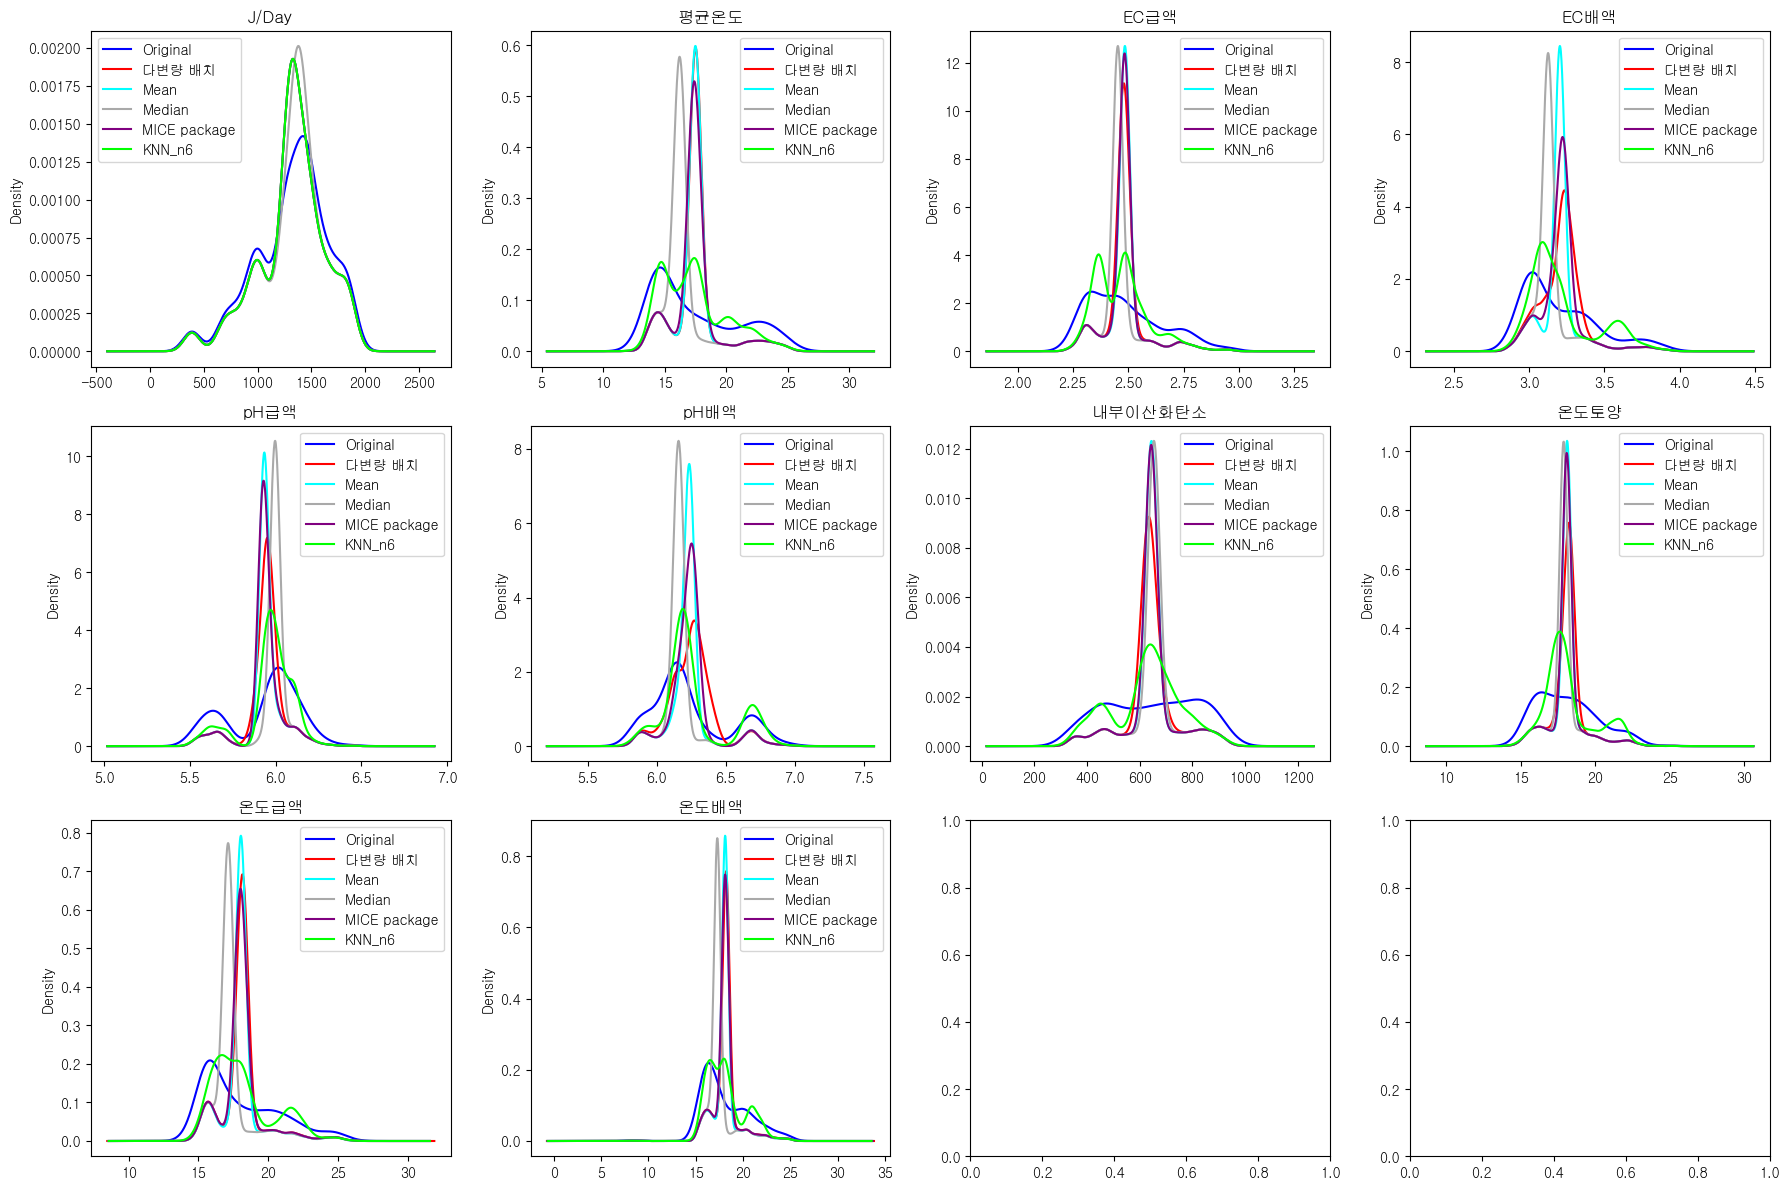

In [68]:
### 시각화 정리 -1 결측치 다변량, mean, median,  결측치 처리
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, (column1, column2, column3, column4, column5, column6) in \
enumerate(zip(tom6_copy.columns, tom6_iterative_imputed.columns,
              tom6_mean.columns, tom6_median.columns,
              tom6_MICE.columns, mm_knn6_tom6.columns)):
    ax = axes[i // 4, i % 4]
    tom6_copy[column1].plot(kind='kde', ax=ax, color='blue', label='Original')
    tom6_iterative_imputed[column2].plot(kind='kde', ax=ax, color='red',
                         label='다변량 배치')
    tom6_mean[column3].plot(
        kind='kde', ax=ax, color='aqua', label='Mean')
    tom6_median[column4].plot(
        kind='kde', ax=ax, color='darkgray', label='Median')
    tom6_MICE[column5].plot(
        kind='kde', ax=ax, color='purple', label='MICE package')
    mm_knn6_tom6[column6].plot(
        kind='kde', ax=ax, color='lime', label='KNN_n6')
    
    ax.set_title(column1)
    ax.legend()

plt.tight_layout()
plt.show()


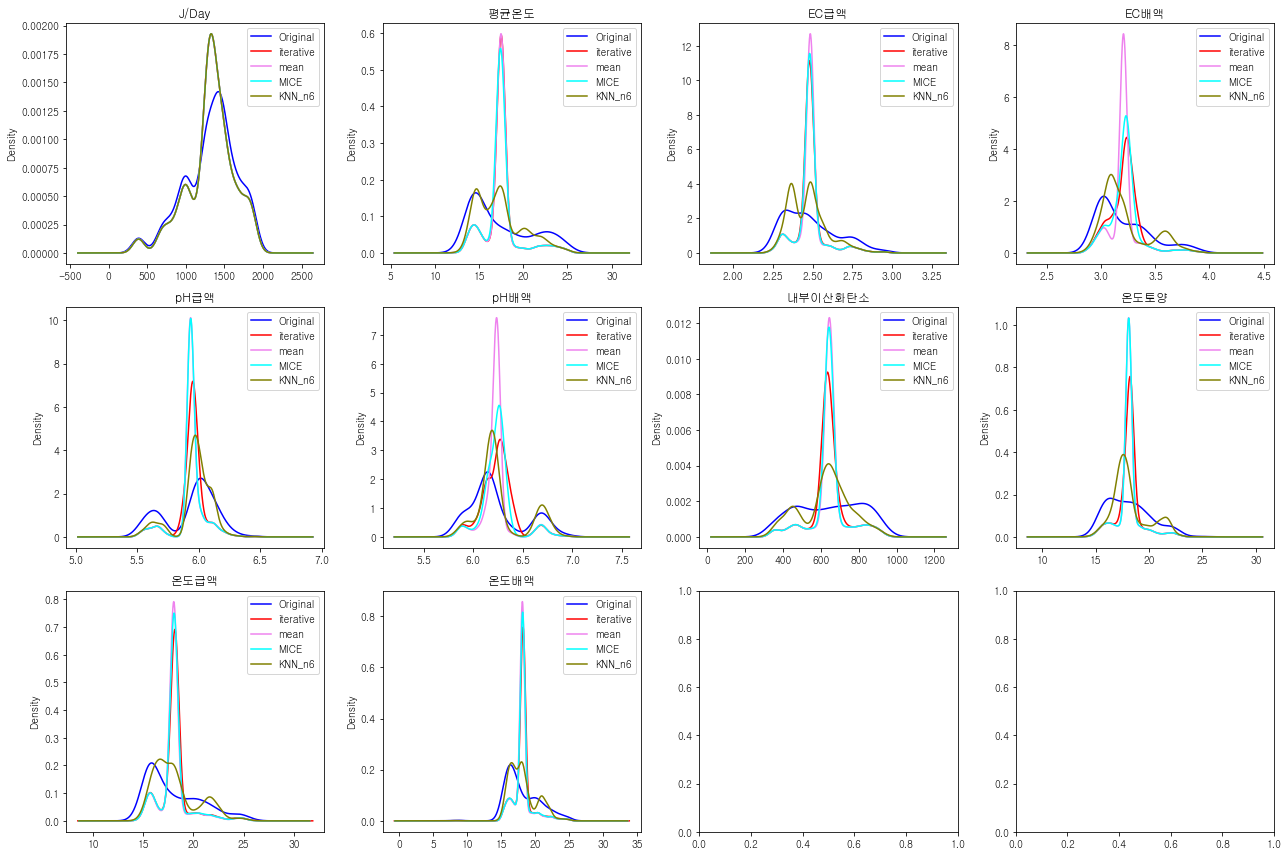

In [97]:
### 시각화 정리 final
# tom6_iterative_imputed, MICE_package, knn_n6 결측치 처리
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i, (column1, column2, column3, column4, column5) in \
enumerate(zip(tom6_copy.columns, tom6_iterative_imputed.columns,
              tom6_mean.columns, tom6_MICE.columns, mm_knn6_tom6.columns)):
    ax = axes[i // 4, i % 4]
    tom6_copy[column1].plot(kind='kde', ax=ax, color='blue', label='Original')
    tom6_iterative_imputed[column2].plot(kind='kde', ax=ax, color='red',
                         label='iterative')
    tom6_mean[column3].plot(kind='kde', ax=ax, color='violet',
                                         label='mean')
    tom6_MICE[column4].plot(kind='kde', ax=ax, color='cyan',
                         label='MICE')
    mm_knn6_tom6[column5].plot(
        kind='kde', ax=ax, color='olive', label='KNN_n6')
    
    ax.set_title(column1)
    ax.legend()

plt.tight_layout()
plt.show()


In [98]:
# tom6_copy.columns, tom6_iterative_imputed.columns,
#               tom6_mean.columns, tom6_MICE.columns, mm_knn6_tom6.columns

In [69]:
## 중간 save
# C:/seokwonna/pythonwork/AI/FinalProject/결측치처리_20230627

tom6_iterative_imputed.to_csv(
    "C:/seokwonna/pythonwork/AI/FinalProject/결측치처리_20230627/tom6_iterative_imputed.csv", encoding='euc-kr')
tom6_mean.to_csv(
    "C:/seokwonna/pythonwork/AI/FinalProject/결측치처리_20230627/tom6_mean.csv", encoding='euc-kr')
tom6_MICE.to_csv(
    "C:/seokwonna/pythonwork/AI/FinalProject/결측치처리_20230627/tom6_MICE.csv", encoding='euc-kr')
mm_knn6_tom6.to_csv("C:/seokwonna/pythonwork/AI/FinalProject/결측치처리_20230627/mm_knn6_tom6.csv", encoding='euc-kr')

In [ ]:
# matplotlib
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # matplotlib 마이너스기호 표시
plt.rc('font', family='NanumGothic')  # matplotlib 한글폰트 표시



<AxesSubplot:>

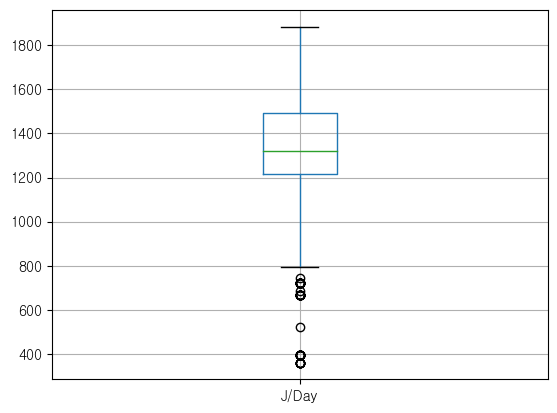

In [70]:
tom6_iterative_imputed.columns
columnlist = ['J/Day', '평균온도', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '온도토양',
              '온도급액', '온도배액']
tom6_iterative_imputed.boxplot(column=['J/Day'])


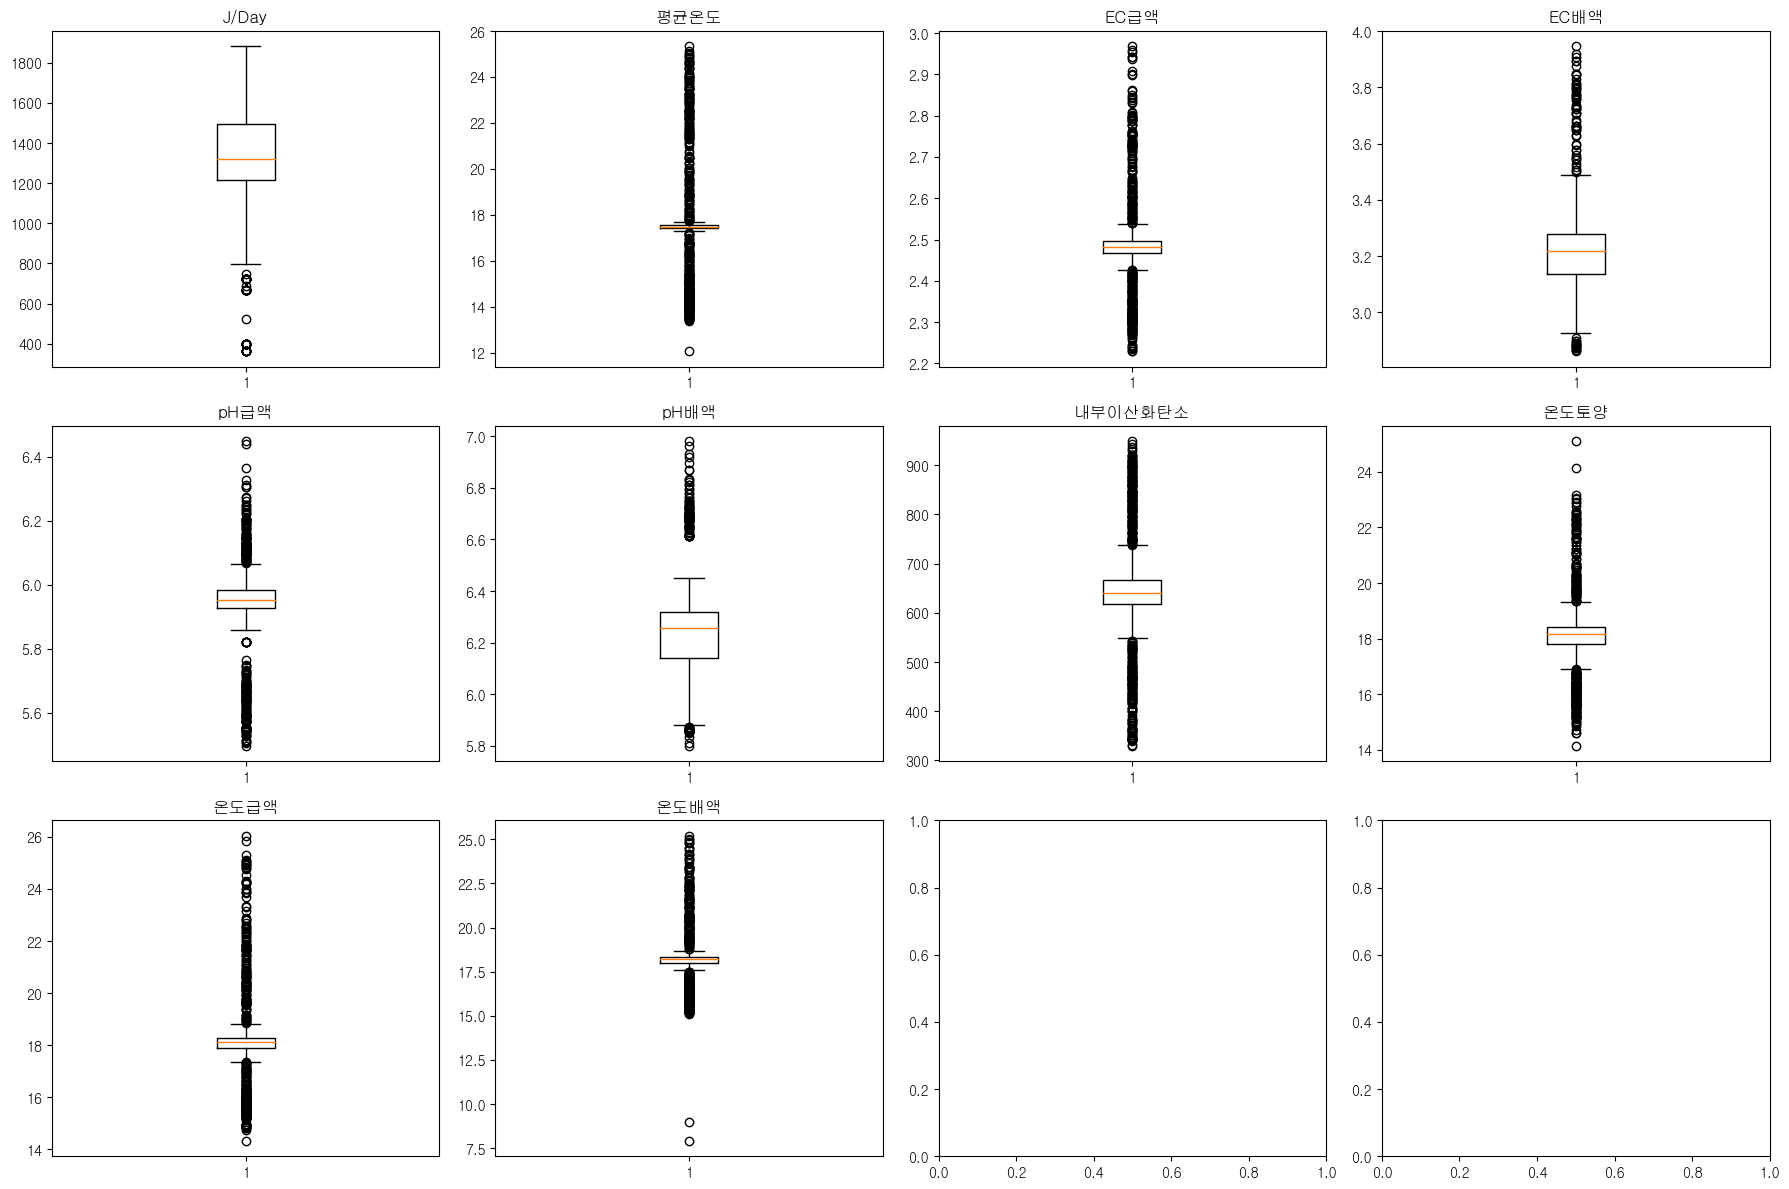

In [71]:
# tom6_iterative_imputed dataframe columns outlier check
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
columnlist = ['J/Day', '평균온도', 'EC급액', 'EC배액',
              'pH급액', 'pH배액', '내부이산화탄소', '온도토양', '온도급액', '온도배액']

for i, column in enumerate(columnlist):
    # Create a boxplot for the current column
    axes[i//4, i % 4].boxplot(tom6_iterative_imputed[column])
    axes[i//4, i % 4].set_title(column)  # Set the title as the column name

plt.tight_layout()
plt.show()


In [72]:
tom6_iterative_imputed.sort_values(by='온도토양', ascending=True)


,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
27,1857.0,25.057902,2.792815,3.892526,5.944310,6.667611,342.611111,14.133433,16.944444,16.933532
1293,1321.0,12.066213,2.395155,2.876890,5.525109,5.985992,908.341085,14.609981,14.730620,15.499516
1294,1321.0,15.657351,2.387434,2.864681,5.596411,5.982973,811.267857,14.614955,14.324219,16.561942
1018,1013.0,14.720511,2.385849,2.976833,5.984008,6.138874,685.378151,14.720511,15.242801,15.497343
1365,1186.0,13.585806,2.446037,3.035981,5.622514,5.860288,900.972973,14.860360,14.969032,16.012387
...,...,...,...,...,...,...,...,...,...,...
101,1884.0,21.525836,2.727220,3.843678,6.014776,6.717395,432.934211,23.004112,24.009868,23.888980
1346,1279.0,23.061991,2.942843,3.396848,5.617881,5.990341,436.785714,23.061991,23.841094,23.440396
100,1884.0,24.006676,2.786002,3.946891,5.996984,6.721312,401.062500,23.170898,24.984375,25.032227
1130,864.0,24.126274,2.715490,3.382645,5.978168,6.286034,430.957983,24.126274,23.883241,23.309599


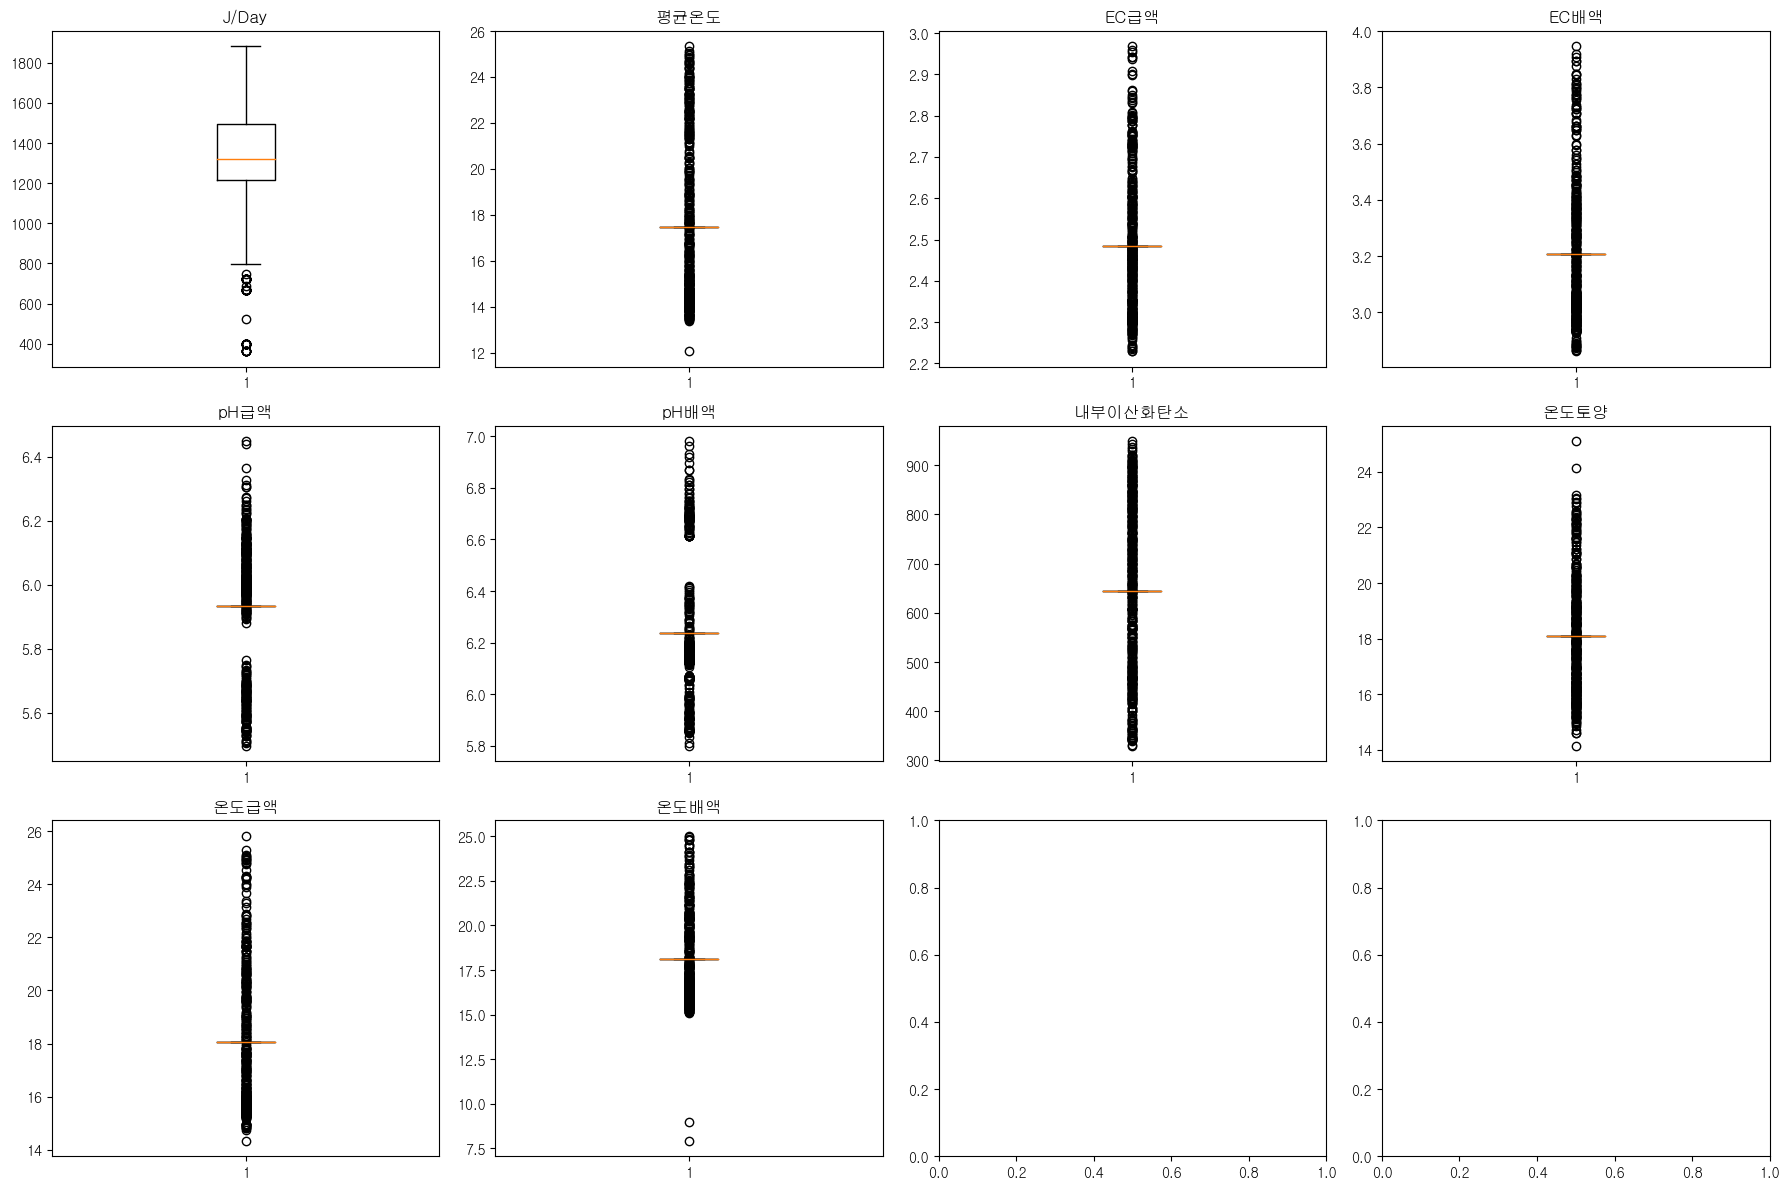

In [73]:
# tom6_mean dataframe columns outlier check
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
columnlist = ['J/Day', '평균온도', 'EC급액', 'EC배액',
              'pH급액', 'pH배액', '내부이산화탄소', '온도토양', '온도급액', '온도배액']

for i, column in enumerate(columnlist):
    # Create a boxplot for the current column
    axes[i//4, i % 4].boxplot(tom6_mean[column])
    axes[i//4, i % 4].set_title(column)  # Set the title as the column name

plt.tight_layout()
plt.show()


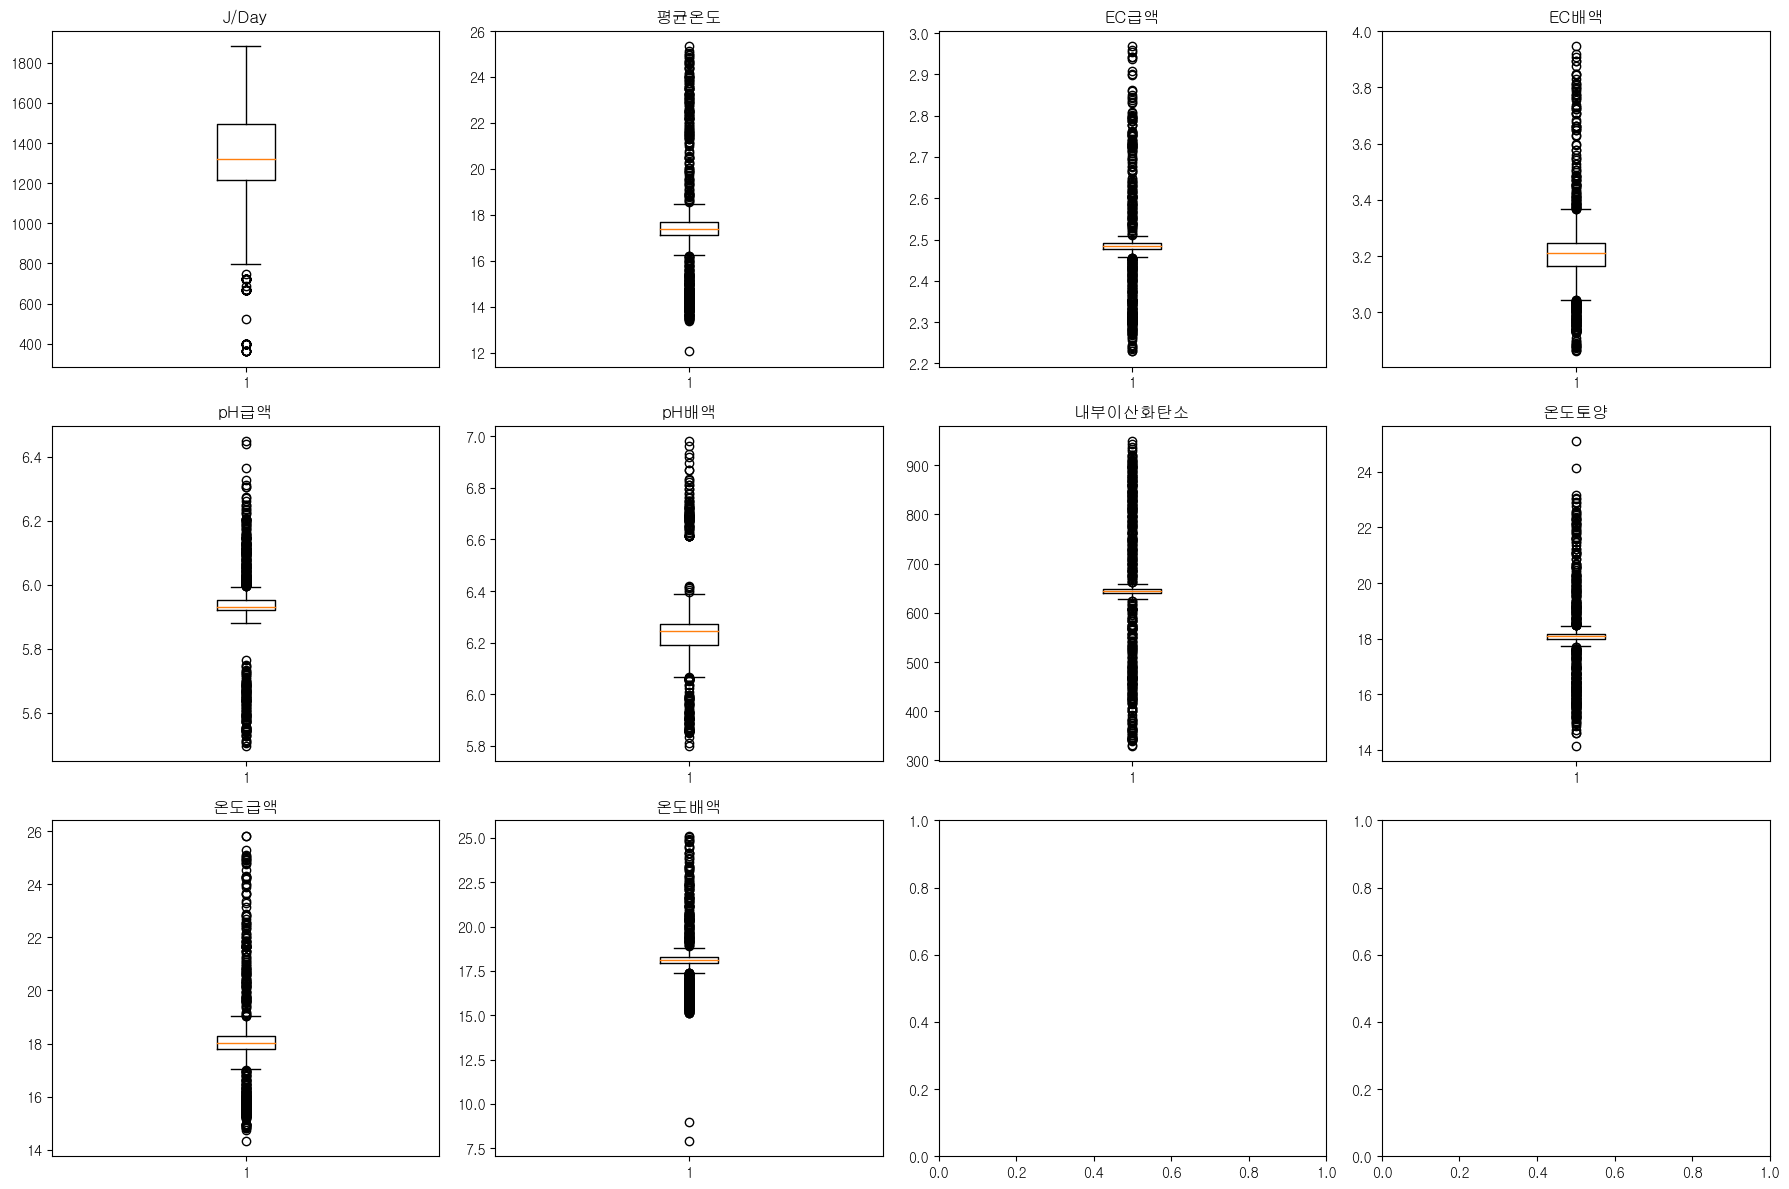

In [74]:
# tom6_MICE dataframe columns outlier check
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
columnlist = ['J/Day', '평균온도', 'EC급액', 'EC배액',
              'pH급액', 'pH배액', '내부이산화탄소', '온도토양', '온도급액', '온도배액']

for i, column in enumerate(columnlist):
    # Create a boxplot for the current column
    axes[i//4, i % 4].boxplot(tom6_MICE[column])
    axes[i//4, i % 4].set_title(column)  # Set the title as the column name

plt.tight_layout()
plt.show()


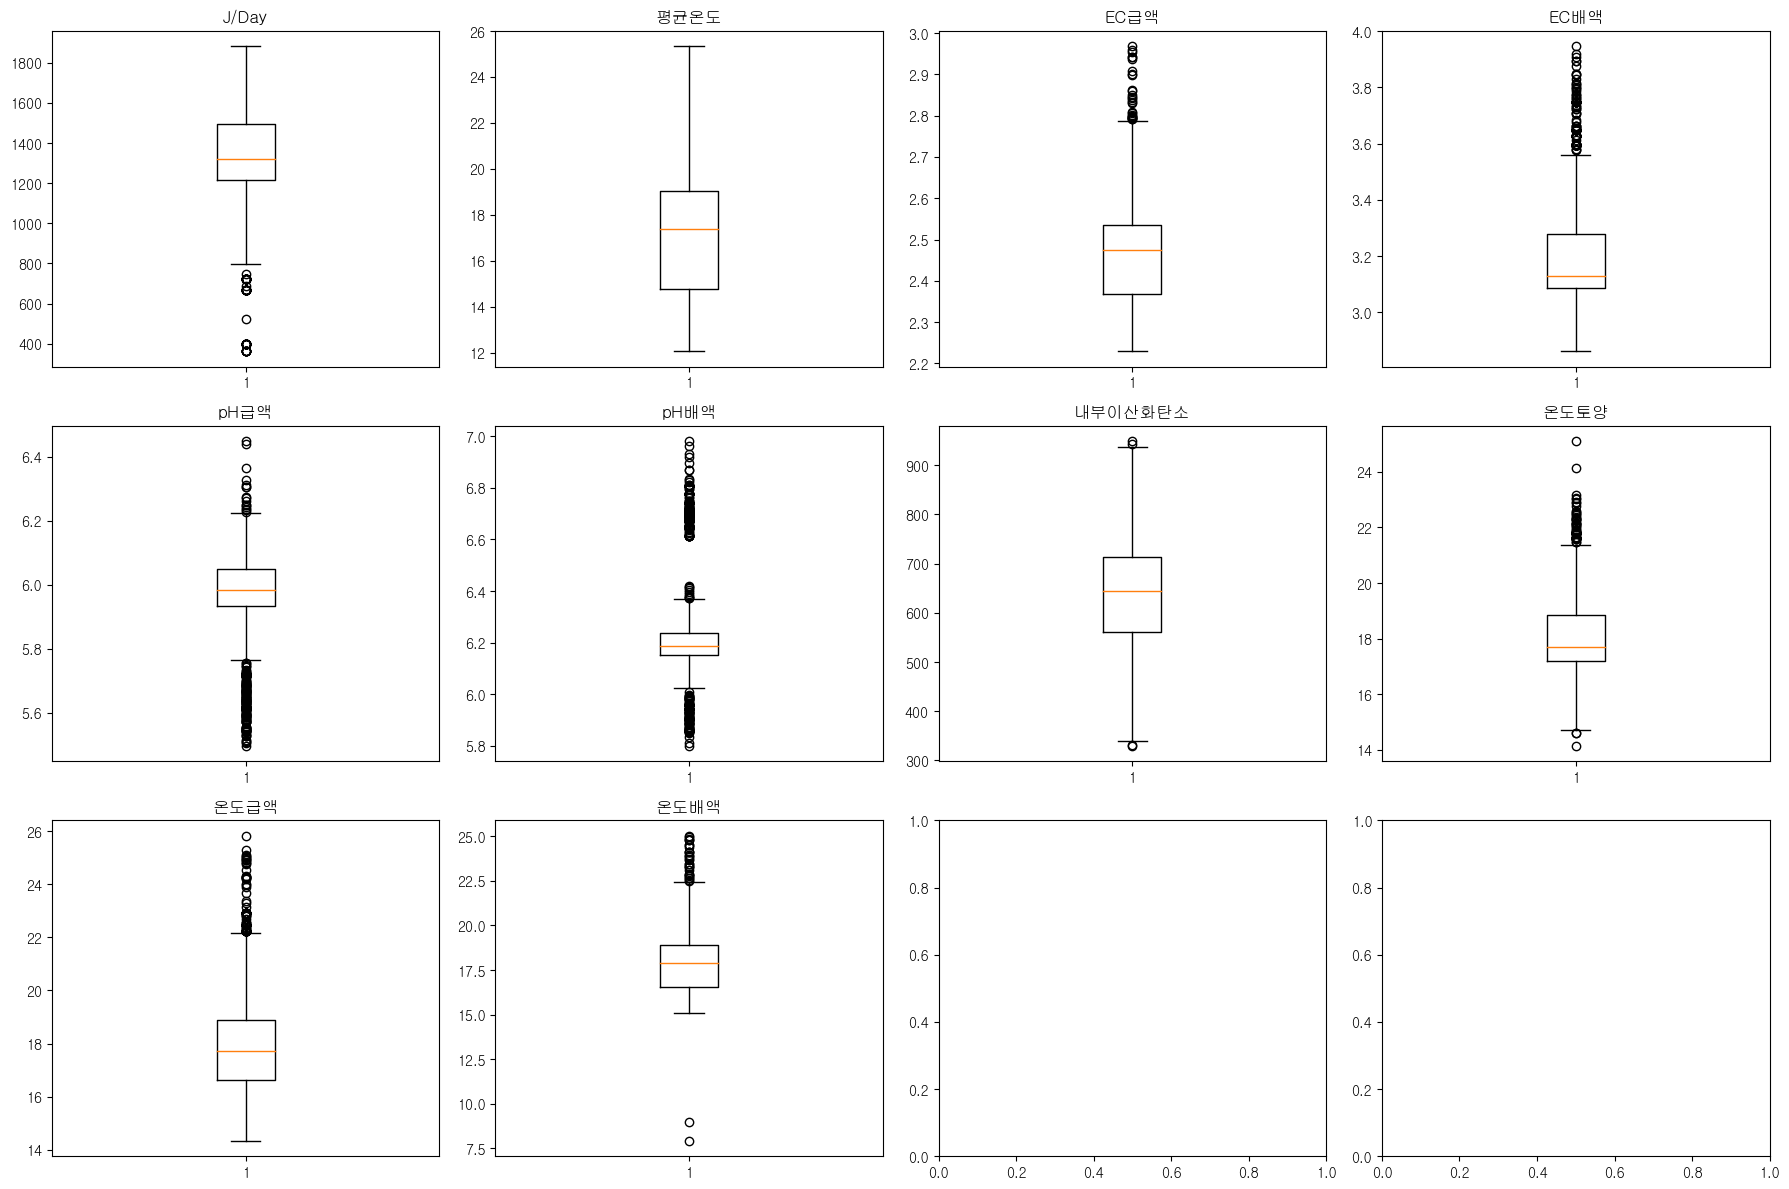

In [75]:
# mm_knn6_tom6 dataframe columns outlier check
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
columnlist = ['J/Day', '평균온도', 'EC급액', 'EC배액',
              'pH급액', 'pH배액', '내부이산화탄소', '온도토양', '온도급액', '온도배액']

for i, column in enumerate(columnlist):
    # Create a boxplot for the current column
    axes[i//4, i % 4].boxplot(mm_knn6_tom6[column])
    axes[i//4, i % 4].set_title(column)  # Set the title as the column name

plt.tight_layout()
plt.show()


In [78]:
tomato_m = pd.read_csv("C:/seokwonna/pythonwork/AI/FinalProject/결측치처리_20230627/토마토_파괴.csv", encoding="utf-8")
tomato_m

,과폭,과고,과중,당도,산도,경도,수분율,주차
0,7.4,5.8,205.0,4.1,4.0,2.650,71.250,45
1,7.9,6.2,210.0,4.7,4.0,2.700,72.500,45
2,7.7,6.0,205.0,4.7,4.0,2.700,71.250,45
3,7.8,5.7,206.0,4.7,4.5,2.720,75.000,45
4,8.1,6.0,223.0,4.3,4.0,2.750,71.250,45
...,...,...,...,...,...,...,...,...
1395,5.3,4.0,81.0,3.9,4.0,2.720,77.700,6
1396,7.1,5.6,158.0,3.7,4.0,2.730,73.000,6
1397,6.8,5.2,134.0,3.8,4.5,2.750,75.810,6
1398,6.5,5.3,137.0,3.5,4.5,2.796,71.856,6


In [80]:
tomato_m.describe()

,과폭,과고,과중,당도,산도,경도,수분율,주차
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,7.709757,6.055007,217.142857,3.980956,4.022857,2.734949,72.814111,29.214286
std,0.984447,0.646100,76.262748,1.177179,0.205827,0.136800,1.992849,22.372436
min,5.200000,4.000000,80.000000,2.200000,3.500000,1.800000,70.000000,1.000000
25%,7.000000,5.600000,161.000000,3.600000,4.000000,2.710000,71.250000,4.000000
50%,7.600000,6.000000,205.500000,3.900000,4.000000,2.733182,72.500000,45.500000
75%,8.300000,6.500000,255.000000,4.300000,4.000000,2.760000,74.100000,49.000000
max,12.000000,8.100000,568.000000,44.500000,4.500000,6.850000,79.800000,52.000000


In [148]:
# 3) 과중, 당도, 산도 

# 과중 : 변동없음 유지
tomato_m["과중"].value_counts().sort_index(ascending = False)
tomato_m["과중"].describe()

count    1400.000000
mean      217.142857
std        76.262748
min        80.000000
25%       161.000000
50%       205.500000
75%       255.000000
max       568.000000
Name: 과중, dtype: float64

In [149]:
# 당도 : "44.5" -> "4.5" 변경 / 콜라 당도 11임을 고려 존재 할 수 없는 토마토
# tomato_m["당도"].value_counts().sort_index(ascending = False)
tomato_m.loc[tomato_m["당도"] == tomato_m["당도"].max(), "당도"] = 4.5


In [150]:

# 산도 : 변동없음 유지
tomato_m["산도"].value_counts().sort_index(ascending = False)


4.5     152
4.0    1160
3.5      88
Name: 산도, dtype: int64

In [151]:
tomato_m.describe()

,과폭,과고,과중,당도,산도,경도,수분율,주차
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,7.709757,6.055007,217.142857,3.952384,4.022857,2.734949,72.814111,29.214286
std,0.984447,0.646100,76.262748,0.459977,0.205827,0.136800,1.992849,22.372436
min,5.200000,4.000000,80.000000,2.200000,3.500000,1.800000,70.000000,1.000000
25%,7.000000,5.600000,161.000000,3.600000,4.000000,2.710000,71.250000,4.000000
50%,7.600000,6.000000,205.500000,3.900000,4.000000,2.733182,72.500000,45.500000
75%,8.300000,6.500000,255.000000,4.300000,4.000000,2.760000,74.100000,49.000000
max,12.000000,8.100000,568.000000,6.300000,4.500000,6.850000,79.800000,52.000000


c:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


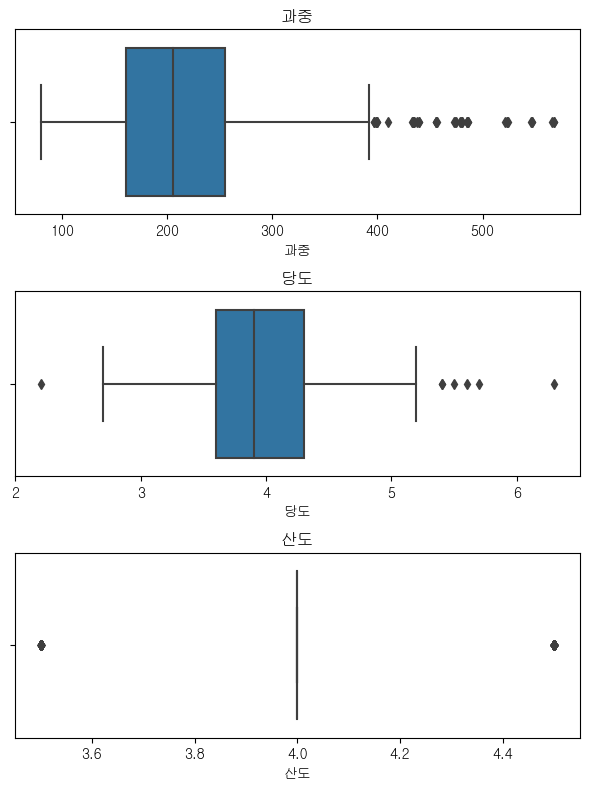

In [164]:
### boxplot
tomato_m_column_list = tomato_m[['과중', '당도', '산도']]

plt.figure(figsize=(6, 8))
for i in range(len(tomato_m_column_list.columns)):
    plt.subplot(3, 1, i+1)
    sns.boxplot(tomato_m_column_list[tomato_m_column_list.columns[i]])
    plt.title(tomato_m_column_list.columns[i])
plt.tight_layout()



In [189]:
import mglearn

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, ElasticNet

from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import mean_squared_error, r2_score


##### 결측치 모델 4개 dataframe 을 각각 X 로 사용하고 회귀모델별로 학습, y값은 토마토 파괴 데이터인 tomato_m 를 사용
### y 값은 과중, 당도, 산도 로 1개의 결과치로 모델 학습
 - 1. tom6_iterative_imputed
 - 2. tom6_mean
 - 3. mm_knn6_tom6
 - 4. tom6_MICE

In [190]:
## 결측치 모델 4개 dataframe 을 각각 X 로 사용하고 회귀모델별로 학습, y값은 토마토 파괴 데이터인 tomato_m 를 사용
# y 값은 과중, 당도, 산도 로 1개의 결과치로 모델 학습

tom6_iterative_imputed.info()
print("================================================")
tom6_mean.info()
print("================================================")
mm_knn6_tom6.info()
print("================================================")
tom6_MICE.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   J/Day    1370 non-null   float64
 1   평균온도     1370 non-null   float64
 2   EC급액     1370 non-null   float64
 3   EC배액     1370 non-null   float64
 4   pH급액     1370 non-null   float64
 5   pH배액     1370 non-null   float64
 6   내부이산화탄소  1370 non-null   float64
 7   온도토양     1370 non-null   float64
 8   온도급액     1370 non-null   float64
 9   온도배액     1370 non-null   float64
dtypes: float64(10)
memory usage: 107.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   J/Day    1370 non-null   float64
 1   평균온도     1370 non-null   float64
 2   EC급액     1370 non-null   float64
 3   EC배액     1370 non-null   float64
 4   pH급액     1370 non-null   float64
 5   pH배액     1370 no

## Train, Test data set up
#### Model 1. X = tom6_iterative_imputed
##### - 1) y_w= tomato_m['과중']
##### - 2) y_b = tomato_m['당도']
##### - 3) y_ph = tomato_m['산도']
 

In [267]:
tomato_m.columns

Index(['과폭', '과고', '과중', '당도', '산도', '경도', '수분율', '주차'], dtype='object')

In [268]:
## print("Iterative_imputed model")
## 토마토 중량 모델
X1 = tom6_iterative_imputed
y_w = tomato_m[['과중']].sample(n=1370, random_state=0)

## 토마토 당도 모델 
X2 = tom6_iterative_imputed
y_b = tomato_m[['당도']].sample(n=1370, random_state=0)

## 토마토 산도 모델
X3 = tom6_iterative_imputed
y_ph = tomato_m[['산도']].sample(n=1370, random_state=0)


In [269]:
print("Iterative_imputed model\n===================================================")

## 토마토 중량 모델
X1_train, X1_test, y_w_train, y_w_test = train_test_split(X1, y_w, test_size=0.15, random_state=0)
print("토마토 중량 모델 : ", X1_train.shape, X1_test.shape)

## 토마토 당도 모델
X2_train, X2_test, y_b_train, y_b_test = train_test_split(X2, y_b, test_size=0.15, random_state=0)
print("토마토 당도 모델 : ", X2_train.shape, X2_test.shape)

## 토마토 산도 모델
X3_train, X3_test, y_ph_train, y_ph_test = train_test_split(X3, y_ph, test_size=0.15, random_state=0)
print("토마토 산도 모델 : ", X3_train.shape, X3_test.shape)


Iterative_imputed model
토마토 중량 모델 :  (1164, 10) (206, 10)
토마토 당도 모델 :  (1164, 10) (206, 10)
토마토 산도 모델 :  (1164, 10) (206, 10)


In [270]:
# 정규화 StandardScaler 사용
standard = StandardScaler()
# minmax = MinMaxScaler()

standard.fit(X1_train)
standard.fit(X2_train)
standard.fit(X3_train)

train_scaled_X1 = standard.transform(X1_train)
test_scaled_X1 = standard.transform(X1_test)

train_scaled_X2 = standard.transform(X2_train)
test_scaled_X2 = standard.transform(X2_test)

train_scaled_X3 = standard.transform(X3_train)
test_scaled_X3 = standard.transform(X3_test)


##### Model 1-1. tom6_iterative_imputed /Linear Regression
- 1) Linear Regression model

In [271]:
print("Iterative_imputed / Linear Regression model")
print("\n ====================================================================== \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X1, y_w_train)
print("6번농장 토마토 '과중'  훈련 점수 : ", linear_model.score(train_scaled_X1, y_w_train))
print("6번농장 토마토 '과중'테스트 점수 : ", linear_model.score(test_scaled_X1, y_w_test))

print("\n ====================================================================== \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X2, y_w_train)
print("6번농장 토마토 '당도'  훈련 점수 : ", linear_model.score(train_scaled_X2, y_b_train))
print("6번농장 토마토 '당도'테스트 점수 : ", linear_model.score(test_scaled_X2, y_b_test))

print("\n ====================================================================== \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X3, y_ph_train)
print("6번농장 토마토 '산도'  훈련 점수 : ", linear_model.score(train_scaled_X3, y_ph_train))
print("6번농장 토마토 '산도'테스트 점수 : ", linear_model.score(test_scaled_X3, y_ph_test))

print("\n ====================================================================== \n")




Iterative_imputed / Linear Regression model


6번농장 토마토 '과중'  훈련 점수 :  0.009501129503220018
6번농장 토마토 '과중'테스트 점수 :  -0.01107860991511056


6번농장 토마토 '당도'  훈련 점수 :  -213053.92001530787
6번농장 토마토 '당도'테스트 점수 :  -241928.49298074268


6번농장 토마토 '산도'  훈련 점수 :  0.002023790886250487
6번농장 토마토 '산도'테스트 점수 :  -0.016799152145646534




In [272]:
# 6번농장 토마토 '과중' 훈련 점수 train model scoring
print("Iterative_imputed / Linear Regression model")
y_w_train_predict = linear_model.predict(train_scaled_X1)

mse = mean_squared_error(y_w_train, y_w_train_predict).round(2) #손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_w_train, y_w_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_w_train, y_w_train_predict).round(2)
print("\n=======================================================\n")
print("Train data linear regression model 토마토 과중 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

# 6번농장 토마토 '당도' 훈련 점수 train model scoring
y_b_train_predict = linear_model.predict(train_scaled_X2)

mse = mean_squared_error(y_b_train, y_b_train_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_train, y_b_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_b_train, y_b_train_predict).round(2)

print("Train data linear regression model 토마토 당도 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

# 6번농장 토마토 '산도' 훈련 점수 train model scoring
y_ph_train_predict = linear_model.predict(train_scaled_X3)

mse = mean_squared_error(y_ph_train, y_ph_train_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_train, y_ph_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_ph_train, y_ph_train_predict).round(2)

print("Train data linear regression model 토마토 산도 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

Iterative_imputed / Linear Regression model


Train data linear regression model 토마토 과중 scoring
MSE  :  51490.37
RMSE :  226.91
R2   :  -7.88


Train data linear regression model 토마토 당도 scoring
MSE  :  0.22
RMSE :  0.47
R2   :  -0.02


Train data linear regression model 토마토 산도 scoring
MSE  :  0.04
RMSE :  0.47
R2   :  0.0




In [273]:
# 6번농장 토마토 '과중' 평가 점수 test data model scoring
print("Iterative_imputed / Linear Regression model")
y_w_test_predict = linear_model.predict(test_scaled_X1)

mse = mean_squared_error(y_w_test, y_w_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_w_test, y_w_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_w_test, y_w_test_predict).round(2)

print("\n============================================================================\n")
print("Test data linear regression model 토마토 과중 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")

# 6번농장 토마토 '당도' 평가 점수 test data model scoring
y_b_test_predict = linear_model.predict(test_scaled_X2)

mse = mean_squared_error(y_b_test, y_b_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_test, y_b_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_b_test, y_b_test_predict).round(2)

print("Test data linear regression model 토마토 당도 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")

# 6번농장 토마토 '산도' 평가 점수 test data model scoring
y_ph_test_predict = linear_model.predict(test_scaled_X3)

mse = mean_squared_error(y_ph_test, y_ph_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_ph_test, y_ph_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_ph_test, y_ph_test_predict).round(2)

print("Test data linear regression model 토마토 산도 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")


Iterative_imputed / Linear Regression model


Test data linear regression model 토마토 과중 predict score
MSE  :  49692.37
RMSE :  222.92
R2   :  -7.11


Test data linear regression model 토마토 당도 predict score
MSE  :  0.2
RMSE :  0.45
R2   :  -0.06


Test data linear regression model 토마토 산도 predict score
MSE  :  0.05
RMSE :  0.23
R2   :  -0.02




##### Model 1-2. tom6_iterative_imputed /Ridge Linear Regression
- 2) Ridge Linear Regression model

In [278]:
print("6번 농장", "/n" "Iterative_imputed", "/n", "Ridge Linear Regression model")
print("\n ====================================================================== \n")
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(50)]}

# 과중
grid_ridge1 = GridSearchCV(Ridge(), params, cv = 100)
grid_ridge1.fit(train_scaled_X1, y_w_train)

pred = grid_ridge1.predict(test_scaled_X1)
rmse = np.sqrt(mean_squared_error(y_w_test, pred))

print("<과중>")
print("파라미터 : ", grid_ridge1.best_params_)
print("훈련 점수 : ", grid_ridge1.best_score_)
print("테스트 점수: ", grid_ridge1.score(test_scaled_X1, y_w_test))
print("rmse : ", rmse)
print("\n ====================================================================== \n")

# 파라미터
params = {"alpha": [round(1000*0.1**i, i) for i in range(50)]}

# 과중
grid_ridge2 = GridSearchCV(Ridge(), params, cv=100)
grid_ridge2.fit(train_scaled_X2, y_b_train)

pred = grid_ridge2.predict(test_scaled_X2)
rmse = np.sqrt(mean_squared_error(y_b_test, pred))

print("<당도>")
print("파라미터 : ", grid_ridge2.best_params_)
print("훈련 점수 : ", grid_ridge2.best_score_)
print("테스트 점수: ", grid_ridge2.score(test_scaled_X2, y_b_test))
print("rmse : ", rmse)
print("\n ====================================================================== \n")

# 파라미터
params = {"alpha": [round(1000*0.1**i, i) for i in range(50)]}

# 과중
grid_ridge3 = GridSearchCV(Ridge(), params, cv=100)
grid_ridge3.fit(train_scaled_X3, y_ph_train)

pred = grid_ridge3.predict(test_scaled_X3)
rmse = np.sqrt(mean_squared_error(y_ph_test, pred))

print("<산도>")
print("파라미터 : ", grid_ridge3.best_params_)
print("훈련 점수 : ", grid_ridge3.best_score_)
print("테스트 점수: ", grid_ridge3.score(test_scaled_X3, y_ph_test))
print("rmse : ", rmse)
print("\n ====================================================================== \n")


6번 농장 /n Iterative_imputed /n Ridge Linear Regression model


<과중>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.1663268584628354
테스트 점수:  -0.0037215849929244094
rmse :  78.41007611264342


<당도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.12256149006639307
테스트 점수:  -0.014658917900854496
rmse :  0.4392351209676713


<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.11095041797888618
테스트 점수:  -0.012023778933354157
rmse :  0.2260285057027856





##### Model 1-3. tom6_iterative_imputed /ElasticNet Linear Regression
- 3) ElasticNet Linear Regression model


In [279]:
### 여기까지

In [ ]:
print("6번 농장", "/n" "Iterative_imputed", "/n", "Ridge Linear Regression model")
print("\n ====================================================================== \n")
# 파라미터
params = {"alpha": [round(1000*0.1**i, i) for i in range(50)],
          "l1_ratio": [round((1 - (0.1*i)), 1) for i in range(50)]}

# 과중
grid_elastic1 = GridSearchCV(ElasticNet(), params, cv=10)
grid_elastic1.fit(train_scaled_X1, y_train_w)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv=5)
grid_elastic.fit(X_train, y_train_s)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv=5)
grid_elastic.fit(X_train, y_train_p)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))
print("rmse : ", rmse)


#### Model 2. X = tom6_mean

In [230]:
## 토마토 중량 모델
X1 = tom6_mean
y_w = tomato_m[['과중']].sample(n=1370, random_state=1)

## 토마토 당도 모델 
X2 = tom6_mean
y_b = tomato_m[['당도']].sample(n=1370, random_state=1)

## 토마토 산도 모델
X3 = tom6_mean
y_ph = tomato_m[['산도']].sample(n=1370, random_state=1)


In [235]:
print("SimpleImputer mean model/Linear Regression model \n===================================================")

## 토마토 중량 모델
X1_train, X1_test, y_w_train, y_w_test = train_test_split(X1, y_w, test_size=0.15, random_state=0)
print("토마토 중량 모델 : ", X1_train.shape, X1_test.shape)

## 토마토 당도 모델
X2_train, X2_test, y_b_train, y_b_test = train_test_split(X2, y_b, test_size=0.15, random_state=0)
print("토마토 당도 모델 : ", X2_train.shape, X2_test.shape)

## 토마토 산도 모델
X3_train, X3_test, y_ph_train, y_ph_test = train_test_split(X3, y_ph, test_size=0.15, random_state=0)
print("토마토 산도 모델 : ", X3_train.shape, X3_test.shape)


SimpleImputer mean model/Linear Regression model 
토마토 중량 모델 :  (1164, 10) (206, 10)
토마토 당도 모델 :  (1164, 10) (206, 10)
토마토 산도 모델 :  (1164, 10) (206, 10)


In [236]:
# 정규화 StandardScaler 사용
standard = StandardScaler()
# minmax = MinMaxScaler()

standard.fit(X1_train)
standard.fit(X2_train)
standard.fit(X3_train)

train_scaled_X1 = standard.transform(X1_train)
test_scaled_X1 = standard.transform(X1_test)

train_scaled_X2 = standard.transform(X2_train)
test_scaled_X2 = standard.transform(X2_test)

train_scaled_X3 = standard.transform(X3_train)
test_scaled_X3 = standard.transform(X3_test)


In [243]:
print("SimpleImputer mean model/Linear Regression model", 
      "\n======================================================================= \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X1, y_w_train)
print("6번농장 토마토 '과중'  훈련 점수 : ", linear_model.score(train_scaled_X1, y_w_train))
print("6번농장 토마토 '과중'테스트 점수 : ", linear_model.score(test_scaled_X1, y_w_test))

print("\n ====================================================================== \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X2, y_w_train)
print("6번농장 토마토 '당도'  훈련 점수 : ", linear_model.score(train_scaled_X2, y_b_train))
print("6번농장 토마토 '당도'테스트 점수 : ", linear_model.score(test_scaled_X2, y_b_test))

print("\n ====================================================================== \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X3, y_ph_train)
print("6번농장 토마토 '산도'  훈련 점수 : ", linear_model.score(train_scaled_X3, y_ph_train))
print("6번농장 토마토 '산도'테스트 점수 : ", linear_model.score(test_scaled_X3, y_ph_test))

print("\n ====================================================================== \n")




SimpleImputer mean model/Linear Regression model 

6번농장 토마토 '과중'  훈련 점수 :  0.017079228329893392
6번농장 토마토 '과중'테스트 점수 :  -0.004917415477735831


6번농장 토마토 '당도'  훈련 점수 :  -217693.70960700215
6번농장 토마토 '당도'테스트 점수 :  -220026.93315865725


6번농장 토마토 '산도'  훈련 점수 :  0.011593403627515264
6번농장 토마토 '산도'테스트 점수 :  0.0028957979737964656




### 6번농장 linear regression model 

In [248]:
# 6번농장 토마토 '과중' 훈련 점수 train model scoring
print("SimpleImputer mean model/Linear Regression model", 
      "\n======================================================================= \n")
y_w_train_predict = linear_model.predict(train_scaled_X1)

mse = mean_squared_error(y_w_train, y_w_train_predict).round(2) #손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_w_train, y_w_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_w_train, y_w_train_predict).round(2)
print("\n=======================================================\n")
print("Train data linear regression model 토마토 과중 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

# 6번농장 토마토 '당도' 훈련 점수 train model scoring
y_b_train_predict = linear_model.predict(train_scaled_X2)

mse = mean_squared_error(y_b_train, y_b_train_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_train, y_b_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_b_train, y_b_train_predict).round(2)

print("Train data linear regression model 토마토 당도 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

# 6번농장 토마토 '산도' 훈련 점수 train model scoring
y_ph_train_predict = linear_model.predict(train_scaled_X3)

mse = mean_squared_error(y_ph_train, y_ph_train_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_train, y_ph_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_ph_train, y_ph_train_predict).round(2)

print("Train data linear regression model 토마토 산도 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

SimpleImputer mean model/Linear Regression model 



Train data linear regression model 토마토 과중 scoring
MSE  :  51572.33
RMSE :  227.1
R2   :  -7.92


Train data linear regression model 토마토 당도 scoring
MSE  :  0.22
RMSE :  0.46
R2   :  -0.02


Train data linear regression model 토마토 산도 scoring
MSE  :  0.04
RMSE :  0.46
R2   :  0.01




In [249]:
print("SimpleImputer mean model/Linear Regression model",
      "\n======================================================================= \n")
# 6번농장 토마토 '과중' 평가 점수 test data model scoring
y_w_test_predict = linear_model.predict(test_scaled_X1)

mse = mean_squared_error(y_w_test, y_w_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_w_test, y_w_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_w_test, y_w_test_predict).round(2)

print("Test data linear regression model 토마토 과중 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")

# 6번농장 토마토 '당도' 평가 점수 test data model scoring
y_b_test_predict = linear_model.predict(test_scaled_X2)

mse = mean_squared_error(y_b_test, y_b_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_test, y_b_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_b_test, y_b_test_predict).round(2)

print("Test data linear regression model 토마토 당도 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")

# 6번농장 토마토 '산도' 평가 점수 test data model scoring
y_ph_test_predict = linear_model.predict(test_scaled_X3)

mse = mean_squared_error(y_ph_test, y_ph_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_ph_test, y_ph_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_ph_test, y_ph_test_predict).round(2)

print("Test data linear regression model 토마토 산도 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")


SimpleImputer mean model/Linear Regression model 

Test data linear regression model 토마토 과중 predict score
MSE  :  50101.25
RMSE :  223.83
R2   :  -7.56


Test data linear regression model 토마토 당도 predict score
MSE  :  0.21
RMSE :  0.46
R2   :  -0.03


Test data linear regression model 토마토 산도 predict score
MSE  :  0.04
RMSE :  0.19
R2   :  0.0




#### Model 3. X = mm_knn6_tom6

In [250]:
## 토마토 중량 모델
X1 = mm_knn6_tom6
y_w = tomato_m[['과중']].sample(n=1370, random_state=2)

## 토마토 당도 모델 
X2 = mm_knn6_tom6
y_b = tomato_m[['당도']].sample(n=1370, random_state=2)

## 토마토 산도 모델
X3 = mm_knn6_tom6
y_ph = tomato_m[['산도']].sample(n=1370, random_state=2)


In [251]:
print("KNNImputer model/Linear Regression model \n===================================================")

## 토마토 중량 모델
X1_train, X1_test, y_w_train, y_w_test = train_test_split(X1, y_w, test_size=0.15, random_state=0)
print("토마토 중량 모델 : ", X1_train.shape, X1_test.shape)

## 토마토 당도 모델
X2_train, X2_test, y_b_train, y_b_test = train_test_split(X2, y_b, test_size=0.15, random_state=0)
print("토마토 당도 모델 : ", X2_train.shape, X2_test.shape)

## 토마토 산도 모델
X3_train, X3_test, y_ph_train, y_ph_test = train_test_split(X3, y_ph, test_size=0.15, random_state=0)
print("토마토 산도 모델 : ", X3_train.shape, X3_test.shape)


KNNImputer mean model/Linear Regression model 
토마토 중량 모델 :  (1164, 10) (206, 10)
토마토 당도 모델 :  (1164, 10) (206, 10)
토마토 산도 모델 :  (1164, 10) (206, 10)


In [252]:
# 정규화 StandardScaler 사용
standard = StandardScaler()
# minmax = MinMaxScaler()

standard.fit(X1_train)
standard.fit(X2_train)
standard.fit(X3_train)

train_scaled_X1 = standard.transform(X1_train)
test_scaled_X1 = standard.transform(X1_test)

train_scaled_X2 = standard.transform(X2_train)
test_scaled_X2 = standard.transform(X2_test)

train_scaled_X3 = standard.transform(X3_train)
test_scaled_X3 = standard.transform(X3_test)


In [257]:
print("KNNImputer model/Linear Regression model", 
      "\n======================================================================= \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X1, y_w_train)
print("6번농장 토마토 '과중'  훈련 점수 : ", linear_model.score(train_scaled_X1, y_w_train))
print("6번농장 토마토 '과중'테스트 점수 : ", linear_model.score(test_scaled_X1, y_w_test))

print("\n ====================================================================== \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X2, y_w_train)
print("6번농장 토마토 '당도'  훈련 점수 : ", linear_model.score(train_scaled_X2, y_b_train))
print("6번농장 토마토 '당도'테스트 점수 : ", linear_model.score(test_scaled_X2, y_b_test))

print("\n ====================================================================== \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X3, y_ph_train)
print("6번농장 토마토 '산도'  훈련 점수 : ", linear_model.score(train_scaled_X3, y_ph_train))
print("6번농장 토마토 '산도'테스트 점수 : ", linear_model.score(test_scaled_X3, y_ph_test))

print("\n ====================================================================== \n")




KNNImputer model/Linear Regression model 

6번농장 토마토 '과중'  훈련 점수 :  0.0055104986924450206
6번농장 토마토 '과중'테스트 점수 :  -0.008658108718350155


6번농장 토마토 '당도'  훈련 점수 :  -210197.08919612027
6번농장 토마토 '당도'테스트 점수 :  -246101.1499834929


6번농장 토마토 '산도'  훈련 점수 :  0.008961605222630342
6번농장 토마토 '산도'테스트 점수 :  -0.06692087601776664




### 6번농장 linear regression model 

In [258]:
# 6번농장 토마토 '과중' 훈련 점수 train model scoring
print("KNNImputer model /Linear Regression model", 
      "\n======================================================================= \n")
y_w_train_predict = linear_model.predict(train_scaled_X1)

mse = mean_squared_error(y_w_train, y_w_train_predict).round(2) #손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_w_train, y_w_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_w_train, y_w_train_predict).round(2)
print("\n=======================================================\n")
print("Train data linear regression model 토마토 과중 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

# 6번농장 토마토 '당도' 훈련 점수 train model scoring
y_b_train_predict = linear_model.predict(train_scaled_X2)

mse = mean_squared_error(y_b_train, y_b_train_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_train, y_b_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_b_train, y_b_train_predict).round(2)

print("Train data linear regression model 토마토 당도 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

# 6번농장 토마토 '산도' 훈련 점수 train model scoring
y_ph_train_predict = linear_model.predict(train_scaled_X3)

mse = mean_squared_error(y_ph_train, y_ph_train_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_train, y_ph_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_ph_train, y_ph_train_predict).round(2)

print("Train data linear regression model 토마토 산도 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

KNNImputer model /Linear Regression model 



Train data linear regression model 토마토 과중 scoring
MSE  :  50991.38
RMSE :  225.81
R2   :  -7.92


Train data linear regression model 토마토 당도 scoring
MSE  :  0.22
RMSE :  0.47
R2   :  -0.04


Train data linear regression model 토마토 산도 scoring
MSE  :  0.04
RMSE :  0.47
R2   :  0.01




In [259]:
print("KNNImputer model/Linear Regression model",
      "\n======================================================================= \n")
# 6번농장 토마토 '과중' 평가 점수 test data model scoring
y_w_test_predict = linear_model.predict(test_scaled_X1)

mse = mean_squared_error(y_w_test, y_w_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_w_test, y_w_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_w_test, y_w_test_predict).round(2)

print("Test data linear regression model 토마토 과중 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")

# 6번농장 토마토 '당도' 평가 점수 test data model scoring
y_b_test_predict = linear_model.predict(test_scaled_X2)

mse = mean_squared_error(y_b_test, y_b_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_test, y_b_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_b_test, y_b_test_predict).round(2)

print("Test data linear regression model 토마토 당도 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")

# 6번농장 토마토 '산도' 평가 점수 test data model scoring
y_ph_test_predict = linear_model.predict(test_scaled_X3)

mse = mean_squared_error(y_ph_test, y_ph_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_ph_test, y_ph_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_ph_test, y_ph_test_predict).round(2)

print("Test data linear regression model 토마토 산도 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")


KNNImputer model/Linear Regression model 

Test data linear regression model 토마토 과중 predict score
MSE  :  51661.65
RMSE :  227.29
R2   :  -7.42


Test data linear regression model 토마토 당도 predict score
MSE  :  0.19
RMSE :  0.43
R2   :  -0.01


Test data linear regression model 토마토 산도 predict score
MSE  :  0.05
RMSE :  0.21
R2   :  -0.07




#### Model 4. X = tom6_MICE(Multivariate Imputation by Chained Equations)

In [ ]:
## 토마토 중량 모델
X1 = tom6_MICE
y_w = tomato_m[['과중']].sample(n=1370, random_state=2)

## 토마토 당도 모델 
X2 = tom6_MICE
y_b = tomato_m[['당도']].sample(n=1370, random_state=2)

## 토마토 산도 모델
X3 = tom6_MICE
y_ph = tomato_m[['산도']].sample(n=1370, random_state=2)


In [260]:
print("MICE(Multivariate Imputation by Chained Equations) model/Linear Regression model \n===================================================")

## 토마토 중량 모델
X1_train, X1_test, y_w_train, y_w_test = train_test_split(X1, y_w, test_size=0.15, random_state=0)
print("토마토 중량 모델 : ", X1_train.shape, X1_test.shape)

## 토마토 당도 모델
X2_train, X2_test, y_b_train, y_b_test = train_test_split(X2, y_b, test_size=0.15, random_state=0)
print("토마토 당도 모델 : ", X2_train.shape, X2_test.shape)

## 토마토 산도 모델
X3_train, X3_test, y_ph_train, y_ph_test = train_test_split(X3, y_ph, test_size=0.15, random_state=0)
print("토마토 산도 모델 : ", X3_train.shape, X3_test.shape)


MICE(Multivariate Imputation by Chained Equations) model/Linear Regression model 
토마토 중량 모델 :  (1164, 10) (206, 10)
토마토 당도 모델 :  (1164, 10) (206, 10)
토마토 산도 모델 :  (1164, 10) (206, 10)


In [261]:
# 정규화 StandardScaler 사용
standard = StandardScaler()
# minmax = MinMaxScaler()

standard.fit(X1_train)
standard.fit(X2_train)
standard.fit(X3_train)

train_scaled_X1 = standard.transform(X1_train)
test_scaled_X1 = standard.transform(X1_test)

train_scaled_X2 = standard.transform(X2_train)
test_scaled_X2 = standard.transform(X2_test)

train_scaled_X3 = standard.transform(X3_train)
test_scaled_X3 = standard.transform(X3_test)


In [262]:
print("MICE(Multivariate Imputation by Chained Equations) model /Linear Regression model",
      "\n======================================================================= \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X1, y_w_train)
print("6번농장 토마토 '과중'  훈련 점수 : ", linear_model.score(train_scaled_X1, y_w_train))
print("6번농장 토마토 '과중'테스트 점수 : ", linear_model.score(test_scaled_X1, y_w_test))

print("\n ====================================================================== \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X2, y_w_train)
print("6번농장 토마토 '당도'  훈련 점수 : ", linear_model.score(train_scaled_X2, y_b_train))
print("6번농장 토마토 '당도'테스트 점수 : ", linear_model.score(test_scaled_X2, y_b_test))

print("\n ====================================================================== \n")

linear_model = LinearRegression()
linear_model.fit(train_scaled_X3, y_ph_train)
print("6번농장 토마토 '산도'  훈련 점수 : ", linear_model.score(train_scaled_X3, y_ph_train))
print("6번농장 토마토 '산도'테스트 점수 : ", linear_model.score(test_scaled_X3, y_ph_test))

print("\n ====================================================================== \n")




MICE(Multivariate Imputation by Chained Equations) model /Linear Regression model 

6번농장 토마토 '과중'  훈련 점수 :  0.0055104986924450206
6번농장 토마토 '과중'테스트 점수 :  -0.008658108718350155


6번농장 토마토 '당도'  훈련 점수 :  -210197.08919612027
6번농장 토마토 '당도'테스트 점수 :  -246101.1499834929


6번농장 토마토 '산도'  훈련 점수 :  0.008961605222630342
6번농장 토마토 '산도'테스트 점수 :  -0.06692087601776664




### 6번농장 linear regression model 

In [263]:
# 6번농장 토마토 '과중' 훈련 점수 train model scoring
print("MICE(Multivariate Imputation by Chained Equations) model /Linear Regression model", 
      "\n======================================================================= \n")
y_w_train_predict = linear_model.predict(train_scaled_X1)

mse = mean_squared_error(y_w_train, y_w_train_predict).round(2) #손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_w_train, y_w_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_w_train, y_w_train_predict).round(2)
print("\n=======================================================\n")
print("Train data linear regression model 토마토 과중 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

# 6번농장 토마토 '당도' 훈련 점수 train model scoring
y_b_train_predict = linear_model.predict(train_scaled_X2)

mse = mean_squared_error(y_b_train, y_b_train_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_train, y_b_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_b_train, y_b_train_predict).round(2)

print("Train data linear regression model 토마토 당도 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

# 6번농장 토마토 '산도' 훈련 점수 train model scoring
y_ph_train_predict = linear_model.predict(train_scaled_X3)

mse = mean_squared_error(y_ph_train, y_ph_train_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_train, y_ph_train_predict)).round(2) #손실값(loss|cost)
r2 = r2_score(y_ph_train, y_ph_train_predict).round(2)

print("Train data linear regression model 토마토 산도 scoring")
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n=======================================================\n")

MICE(Multivariate Imputation by Chained Equations) model /Linear Regression model 



Train data linear regression model 토마토 과중 scoring
MSE  :  50991.38
RMSE :  225.81
R2   :  -7.92


Train data linear regression model 토마토 당도 scoring
MSE  :  0.22
RMSE :  0.47
R2   :  -0.04


Train data linear regression model 토마토 산도 scoring
MSE  :  0.04
RMSE :  0.47
R2   :  0.01




In [264]:
print("MICE(Multivariate Imputation by Chained Equations) model/Linear Regression model",
      "\n======================================================================= \n")
# 6번농장 토마토 '과중' 평가 점수 test data model scoring
y_w_test_predict = linear_model.predict(test_scaled_X1)

mse = mean_squared_error(y_w_test, y_w_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_w_test, y_w_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_w_test, y_w_test_predict).round(2)

print("Test data linear regression model 토마토 과중 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")

# 6번농장 토마토 '당도' 평가 점수 test data model scoring
y_b_test_predict = linear_model.predict(test_scaled_X2)

mse = mean_squared_error(y_b_test, y_b_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_b_test, y_b_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_b_test, y_b_test_predict).round(2)

print("Test data linear regression model 토마토 당도 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")

# 6번농장 토마토 '산도' 평가 점수 test data model scoring
y_ph_test_predict = linear_model.predict(test_scaled_X3)

mse = mean_squared_error(y_ph_test, y_ph_test_predict).round(2)  # 손실값(loss|cost)
rmse = np.sqrt(mean_squared_error(y_ph_test, y_ph_test_predict)
               ).round(2)  # 손실값(loss|cost)
r2 = r2_score(y_ph_test, y_ph_test_predict).round(2)

print("Test data linear regression model 토마토 산도 predict score")
#MSE, RMSE 가 낮을수록 좋은 예측 모델임, R2가 높을수록 좋은 예측 모델임
print("MSE  : ", mse)
print("RMSE : ", rmse)
print("R2   : ", r2)
print("\n============================================================================\n")


MICE(Multivariate Imputation by Chained Equations) model/Linear Regression model 

Test data linear regression model 토마토 과중 predict score
MSE  :  51661.65
RMSE :  227.29
R2   :  -7.42


Test data linear regression model 토마토 당도 predict score
MSE  :  0.19
RMSE :  0.43
R2   :  -0.01


Test data linear regression model 토마토 산도 predict score
MSE  :  0.05
RMSE :  0.21
R2   :  -0.07




### Ridge model()

In [138]:
### LogisticRegression model 학습

model = LogisticRegression(max_iter = 1000000)
model.fit(train_scaled, y_train)


ValueError: y should be a 1d array, got an array of shape (1164, 3) instead.

In [ ]:
#Hyper-parameter tuning using GridSearchCV

param_grid = {"C": [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 10000]}

Logistic_grid = GridSearchCV(LogisticRegression(
), param_grid, cv=10, scoring='accuracy', verbose=1)
Logistic_grid.fit(train_final, y_train)


In [ ]:
# GridSearchCV를 이용한 logisticRegression accuracy_score
pred_grid = Logistic_grid.predict(test_final)
acc_grid = accuracy_score(y_test, pred_grid).round(3)
print("정확도 : ", acc_grid)